In [7]:
from dna_features_viewer import BiopythonTranslator, GraphicFeature, GraphicRecord
from dna_features_viewer.biotools import annotate_biopython_record
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO

In [4]:
class MyCustomTranslator(BiopythonTranslator):
    """Custom translator implementing the following theme:

    - Color genes in blue, promoters in pink
    

    """

    def compute_feature_color(self, feature):
        if feature.type == "CDS":
            return "blue"
        elif feature.type == "promoter":
            return "#fbb4ae"
        else:
            return "#b3cde3"

    def compute_feature_label(self, feature):
        if feature.type == "CDS":
            return "CDS here"
        elif feature.type == "promoter":
            # text returned here is the label displayed in the figure
            return None
        else:
            return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        """Only display genes """
        return [
            feature for feature in features
            if (feature.type == "gene") #or feature.type=="promoter")
        ]




In [5]:
name_list = [
        "acpM-kasA",
        "gid",
        "rpsA",
        "clpC",
        "embCAB",
        "aftB-ubiA",
        "rrs-rrl",
        "ethAR",
        "oxyR-ahpC",
        "tlyA",
        "KatG",
        "rpsL",
        "rpoBC",
        "FabG1-inhA",
        "eis",
        "gyrBA",
        "panD",
        "pncA"
    ]

drug_list = ['ETHIONAMIDE',
 'STREPTOMYCIN',
 'CAPREOMYCIN',
 'RIFAMPICIN',
 'PYRAZINAMIDE',
 'AMIKACIN',
 'KANAMYCIN',
 'ETHAMBUTOL',
 'OFLOXACIN',
 'CIPROFLOXACIN',
 'MOXIFLOXACIN',
 'LEVOFLOXACIN',
 'ISONIAZID']

In [6]:
data_path = "../output_data/"

# Read in the coordinates of the model in H37Rv numbering
coords = np.load(f"{data_path}/X_matrix_H37RV_coords.npy")

# Models were padded with 0, so fill in with nans
coords[coords==0] = np.nan

# Confirm correct locus lengths
lens = coords.shape[0] - np.isnan(coords).sum(axis=0)
name_to_len = {}
for name, l in zip(name_list, lens):
    name_to_len[name] = l
 
# coords were 0-indexed so must add 1
coords = coords + 1


mkdir: figures: File exists


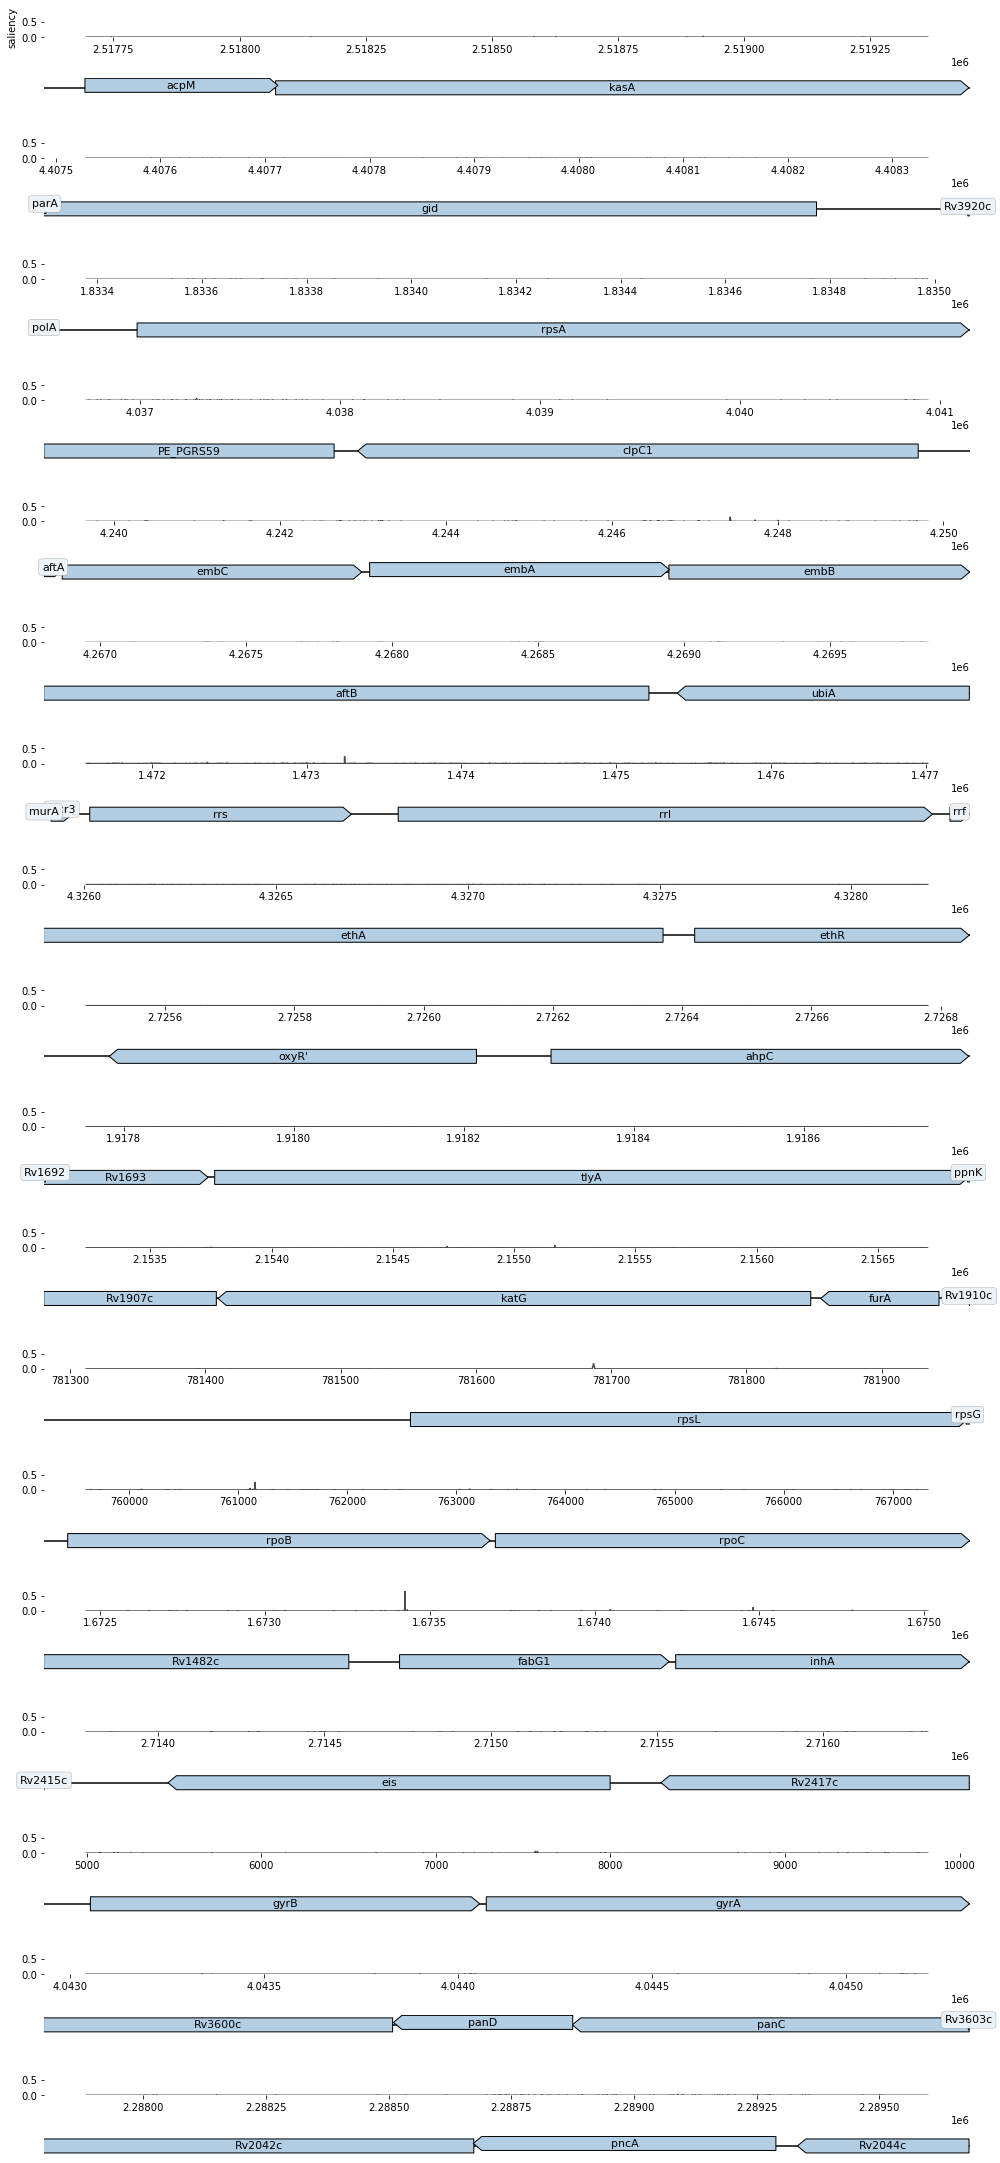

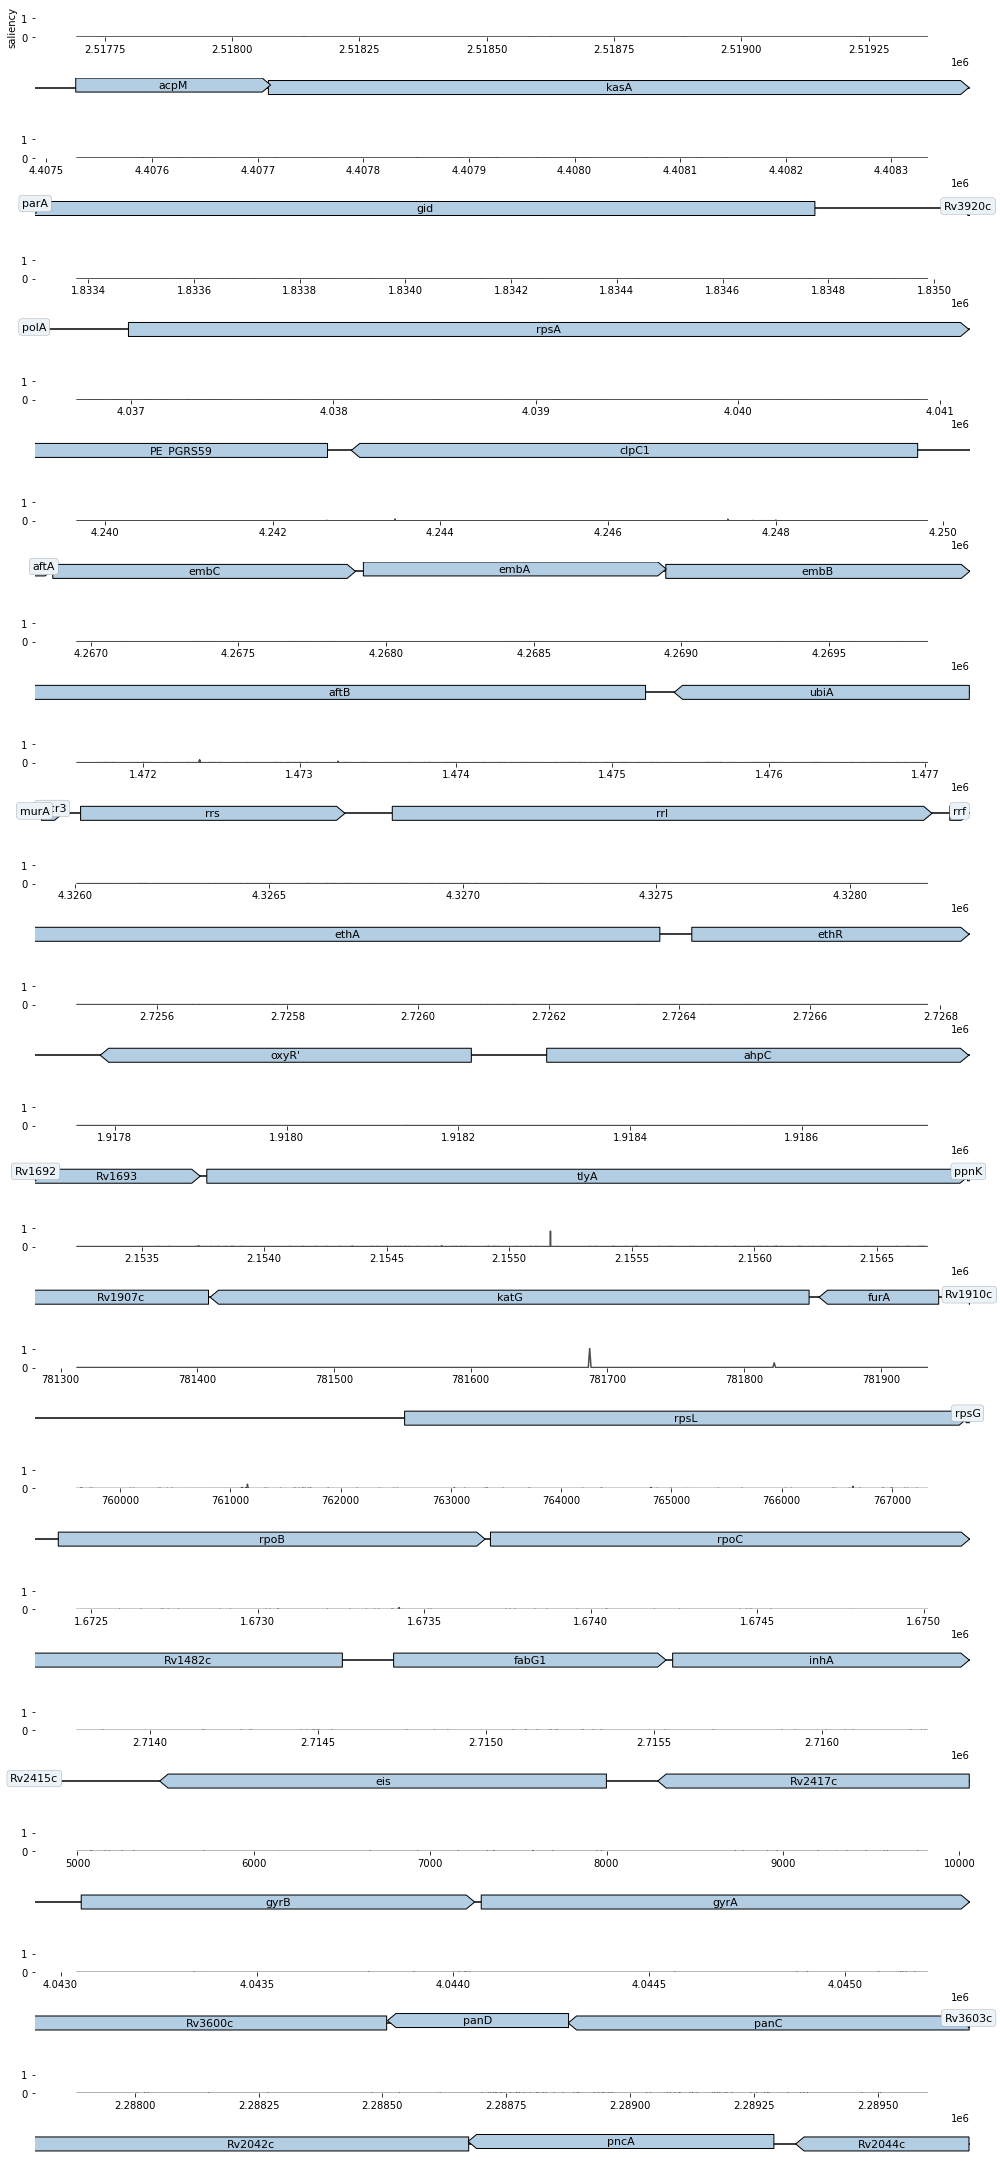

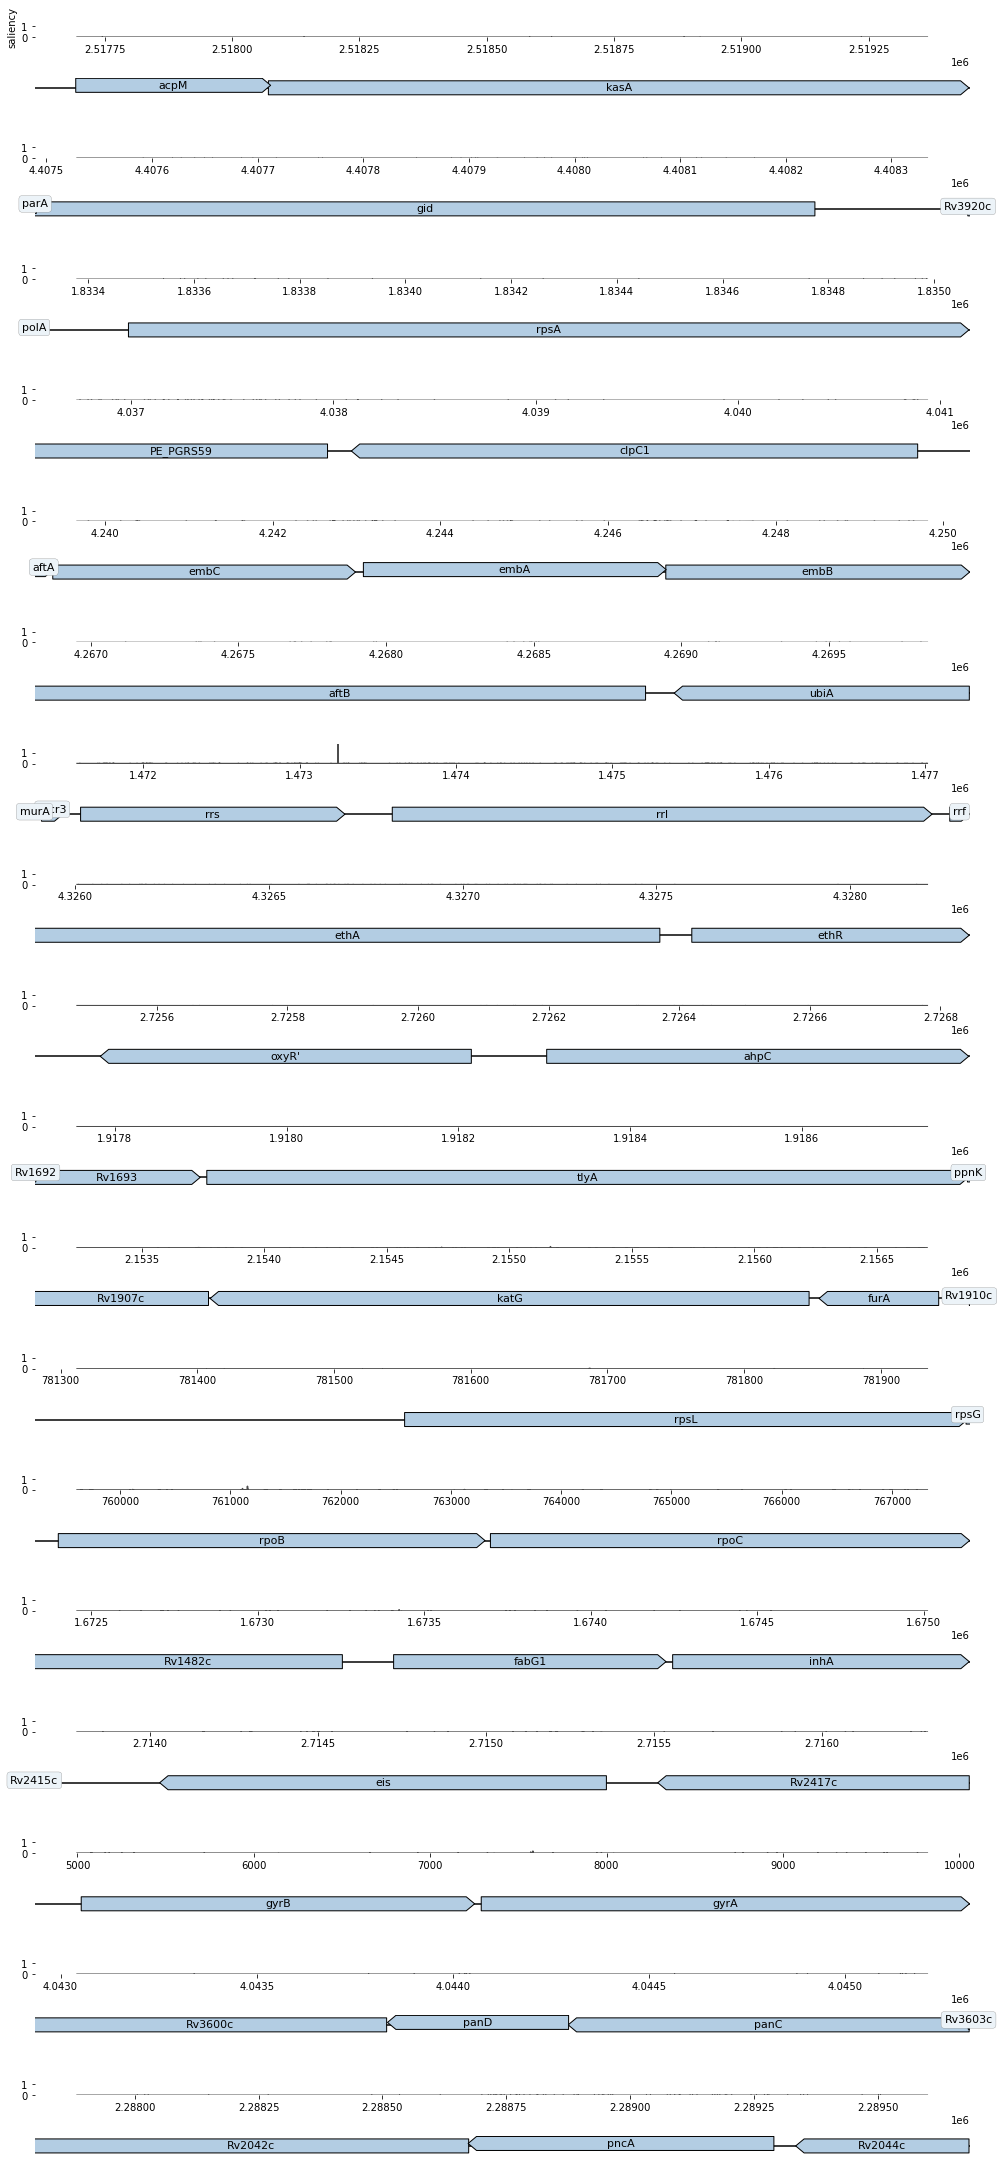

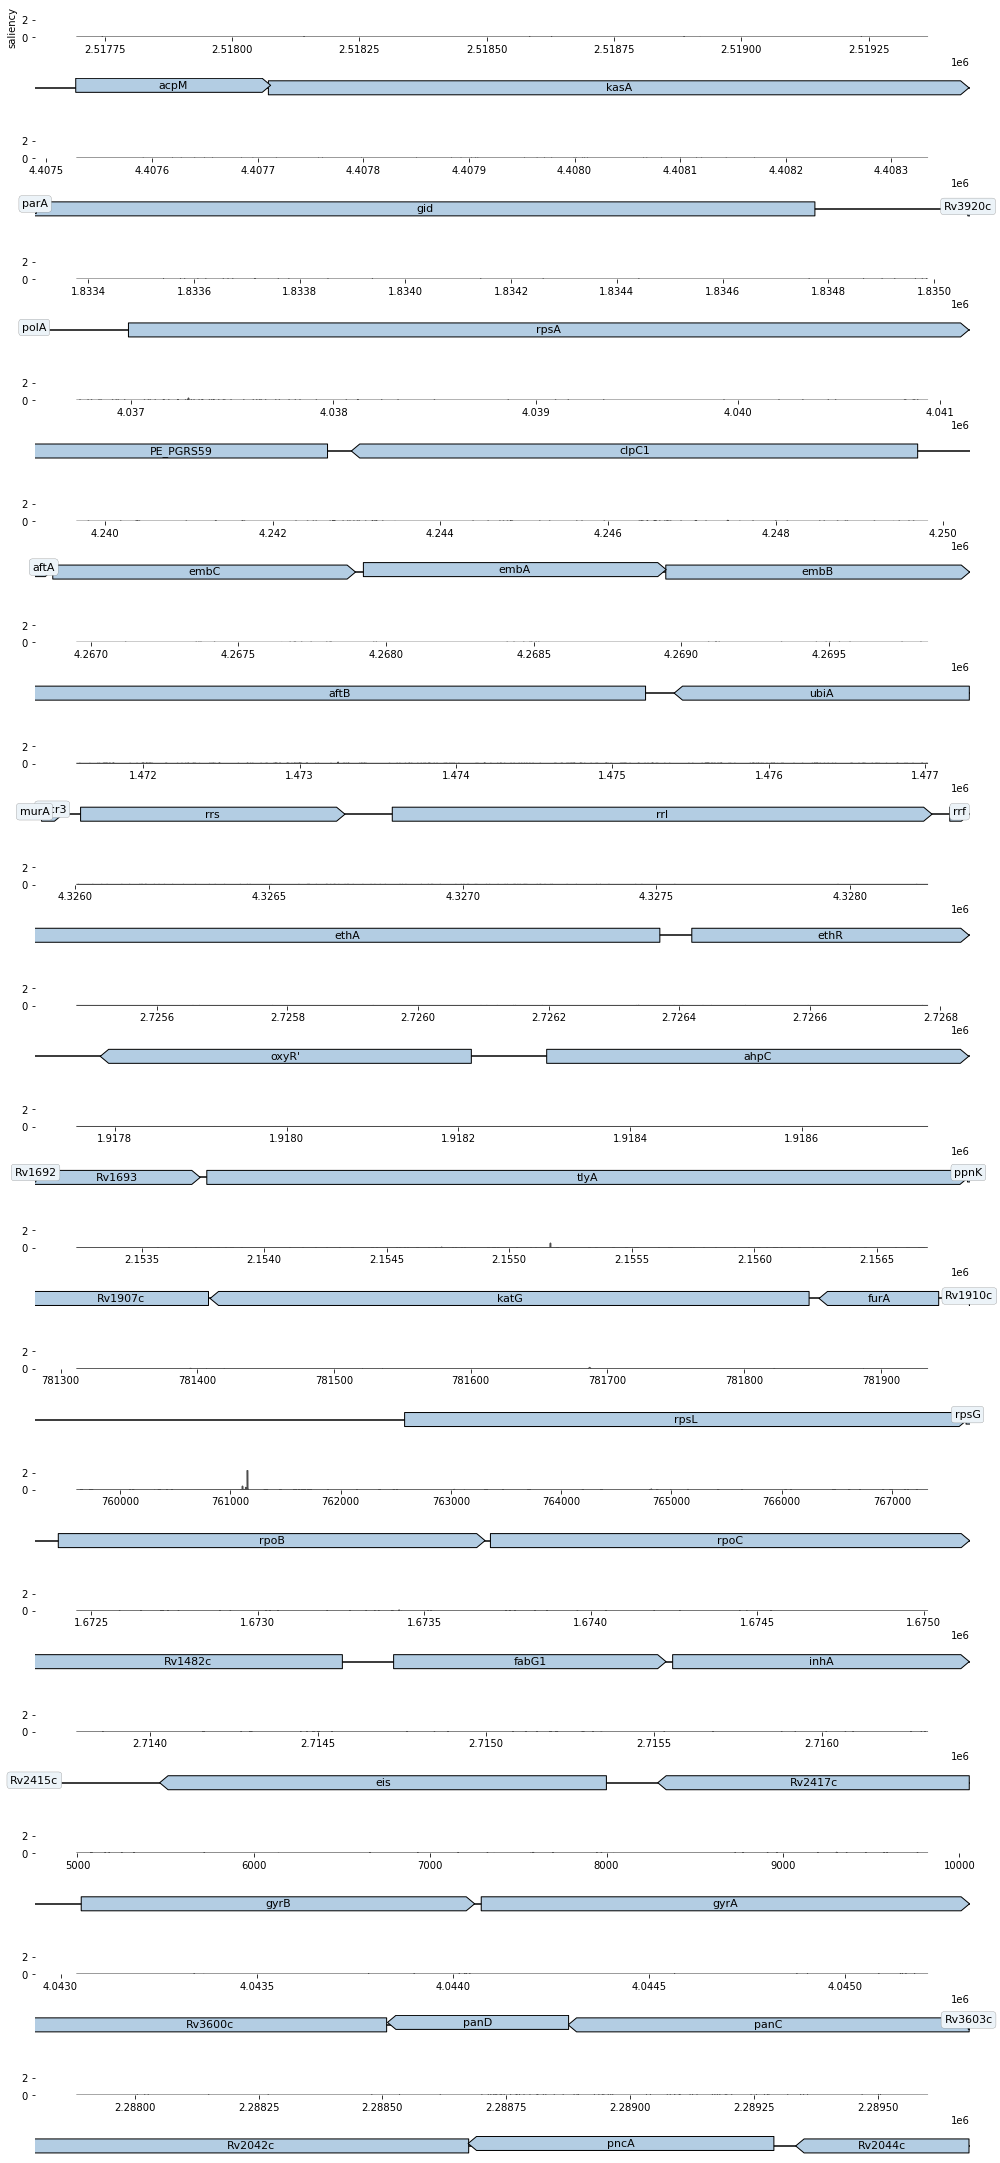

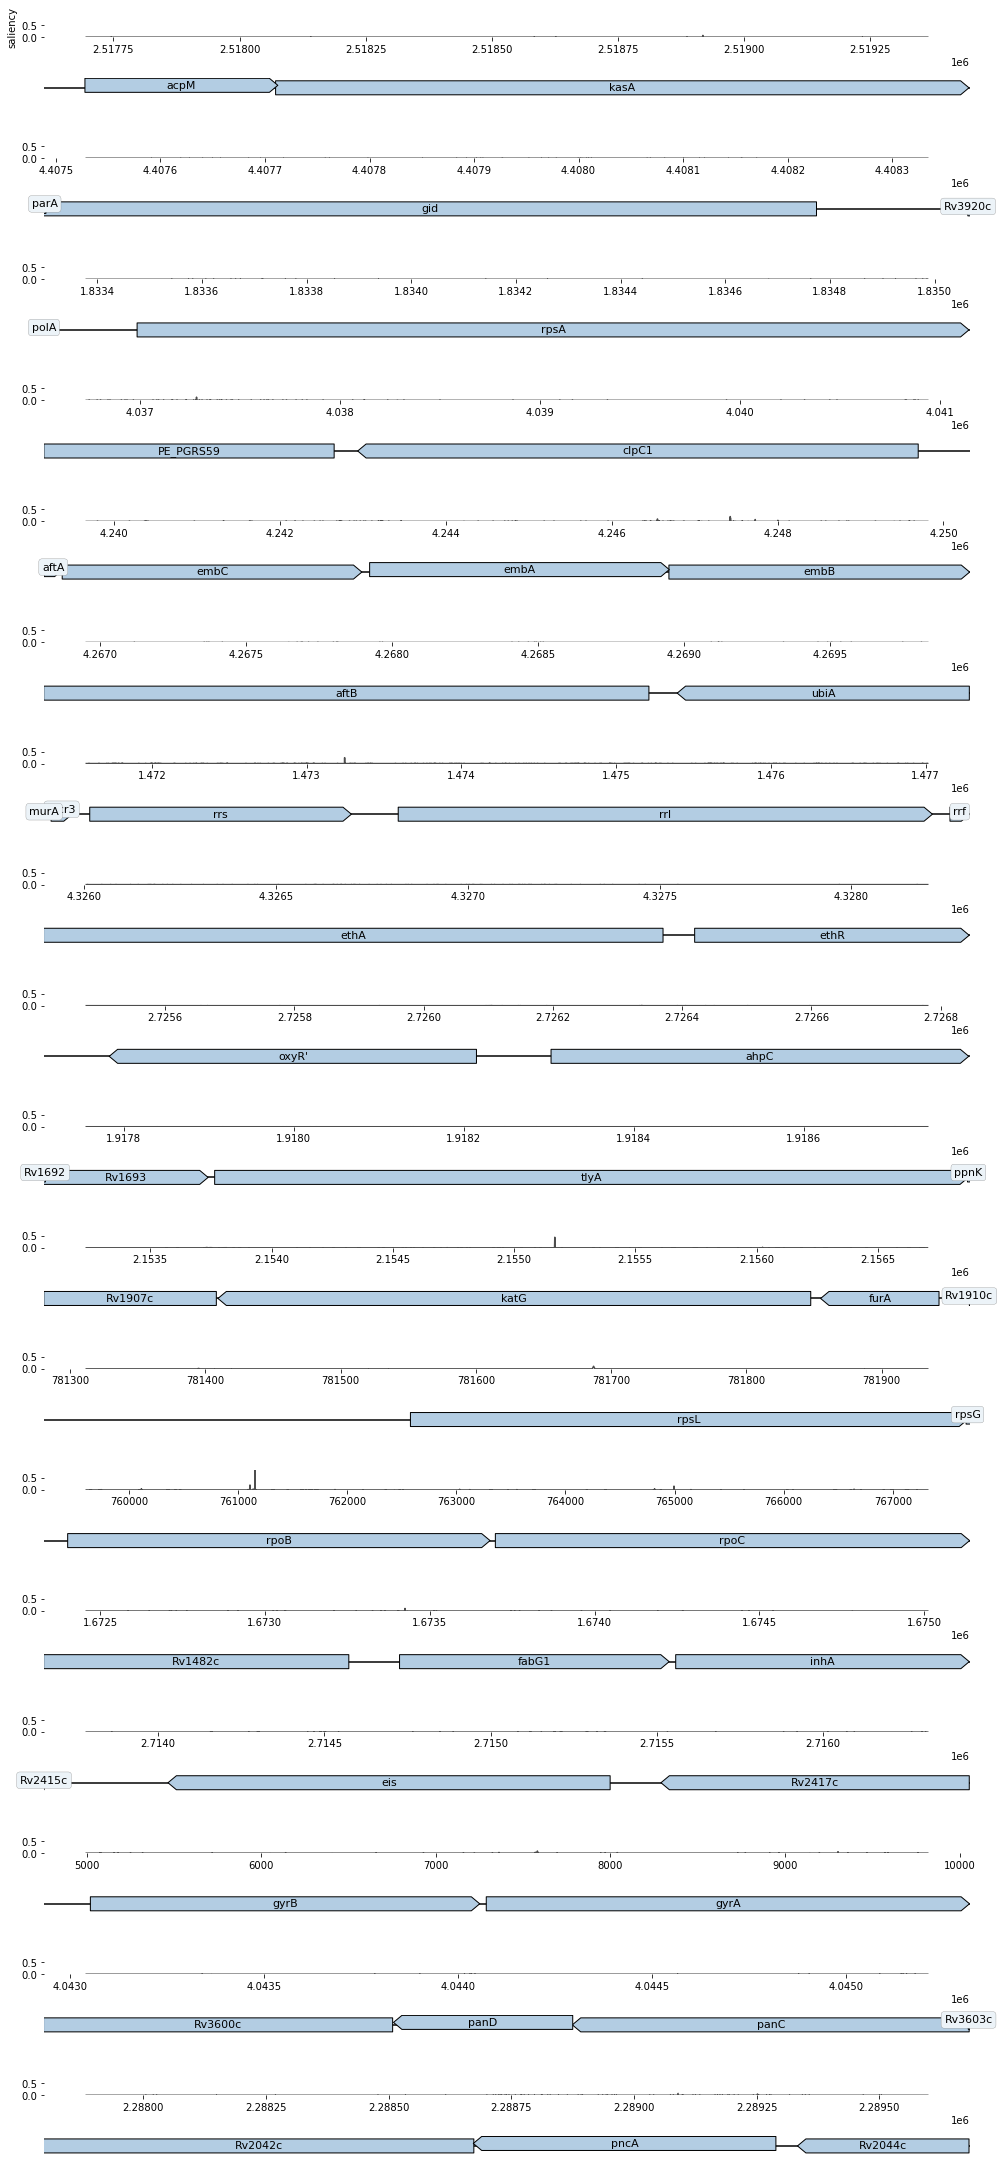

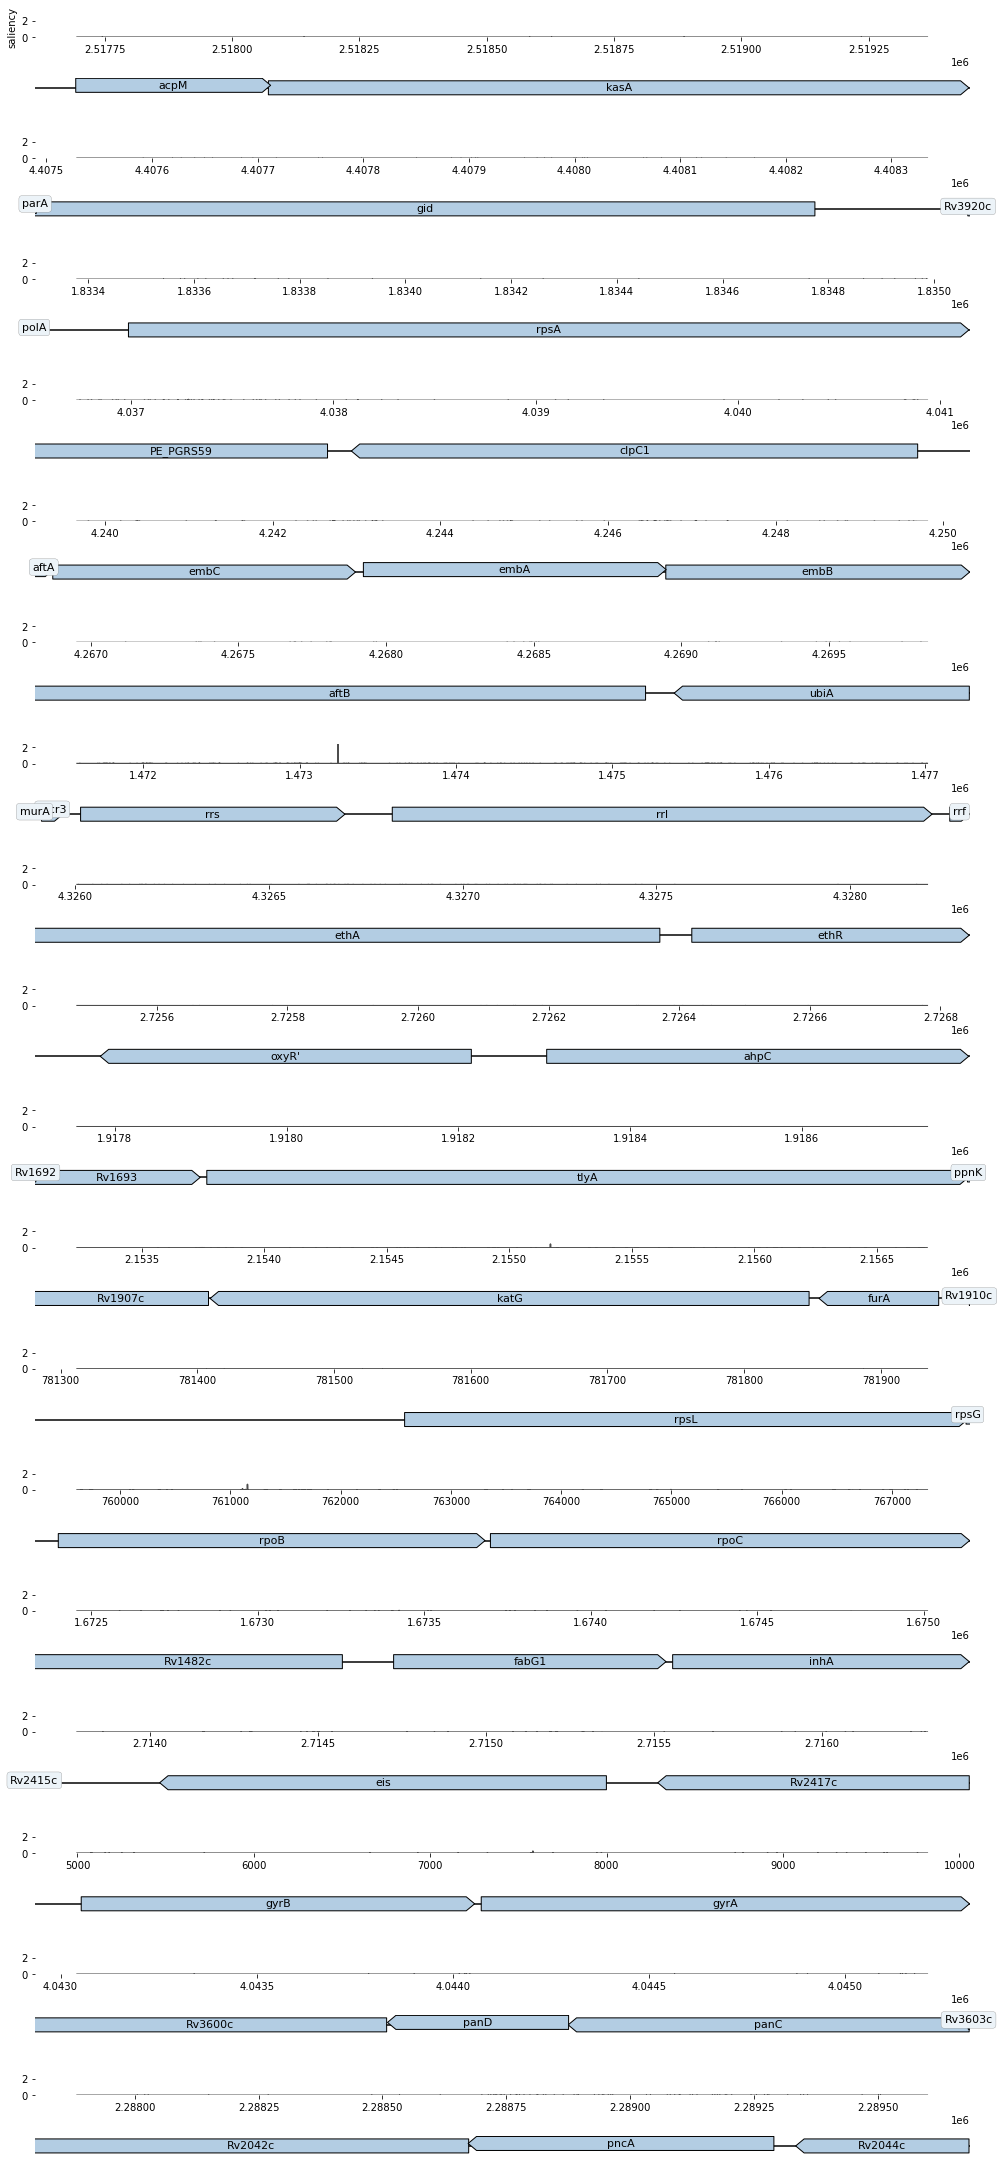

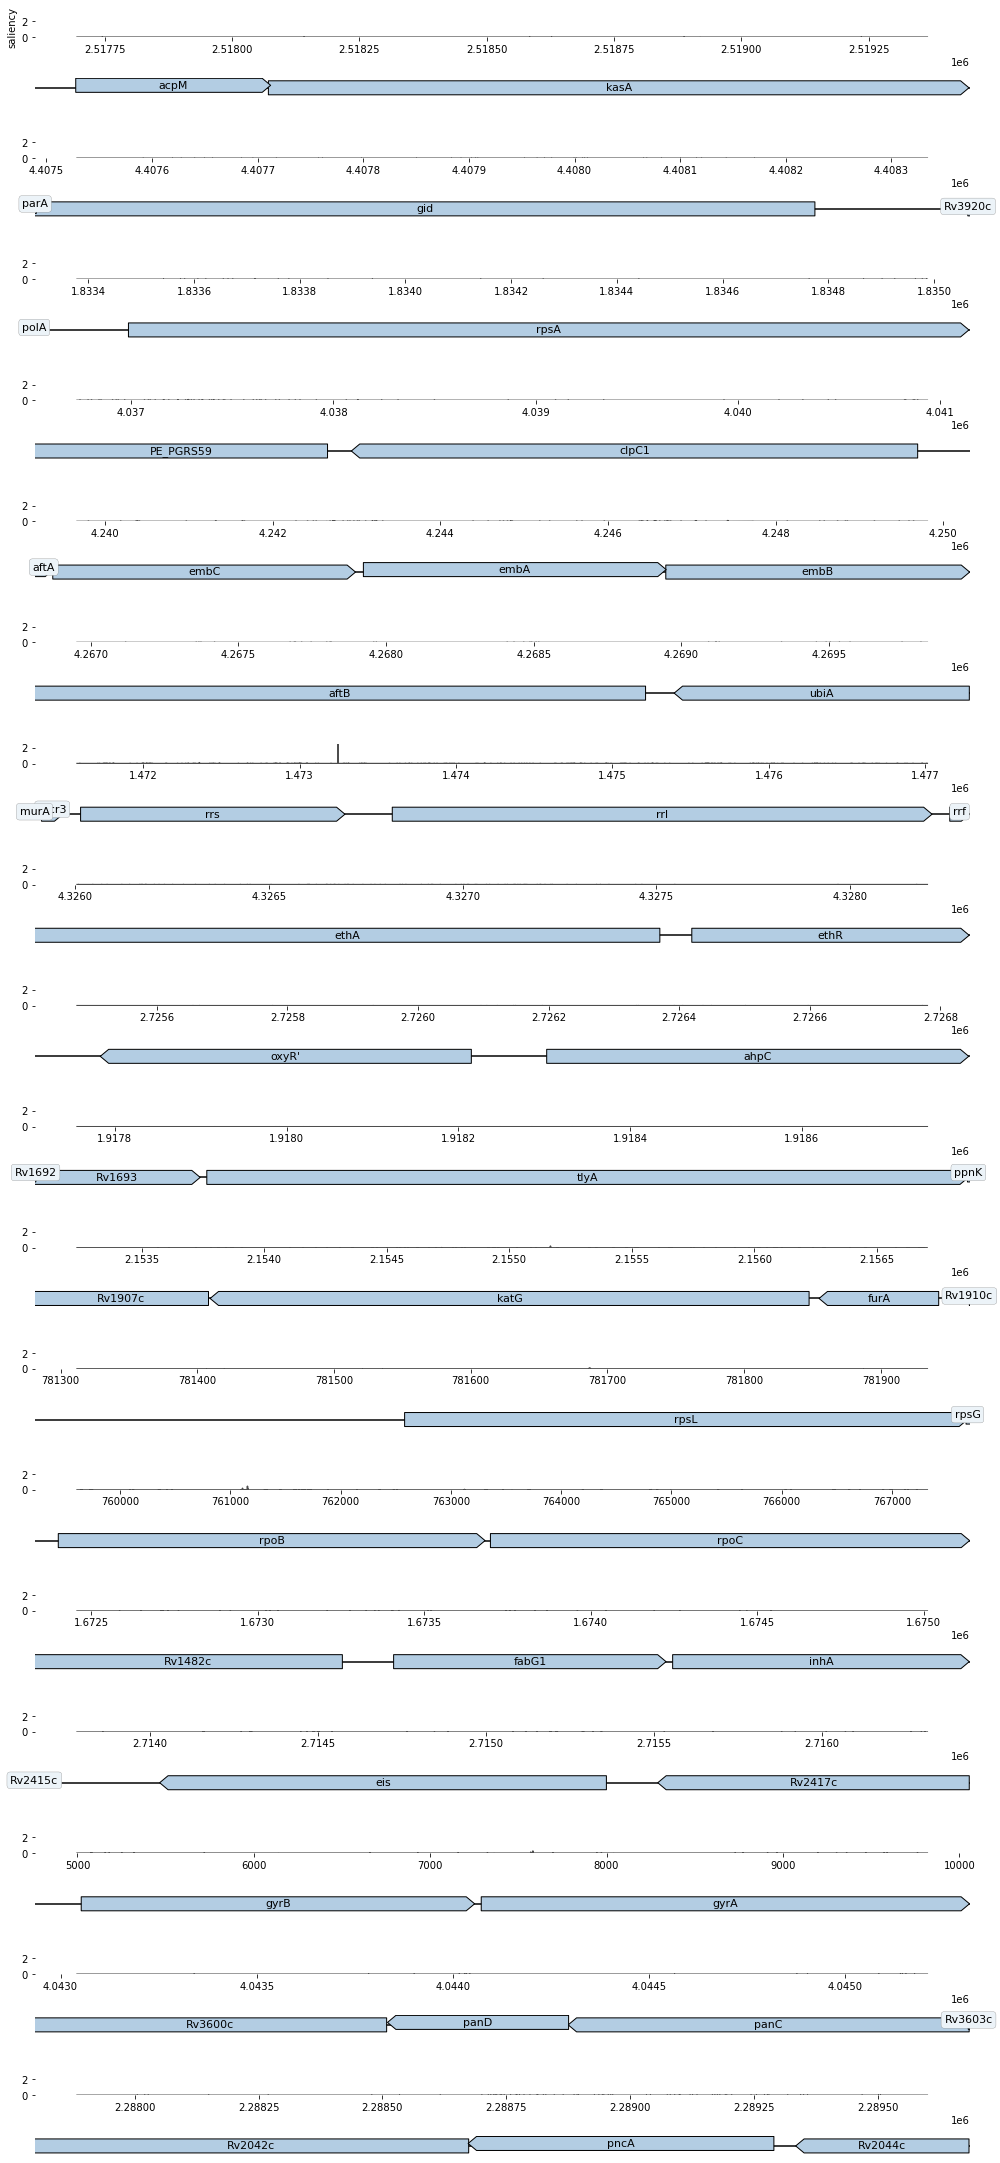

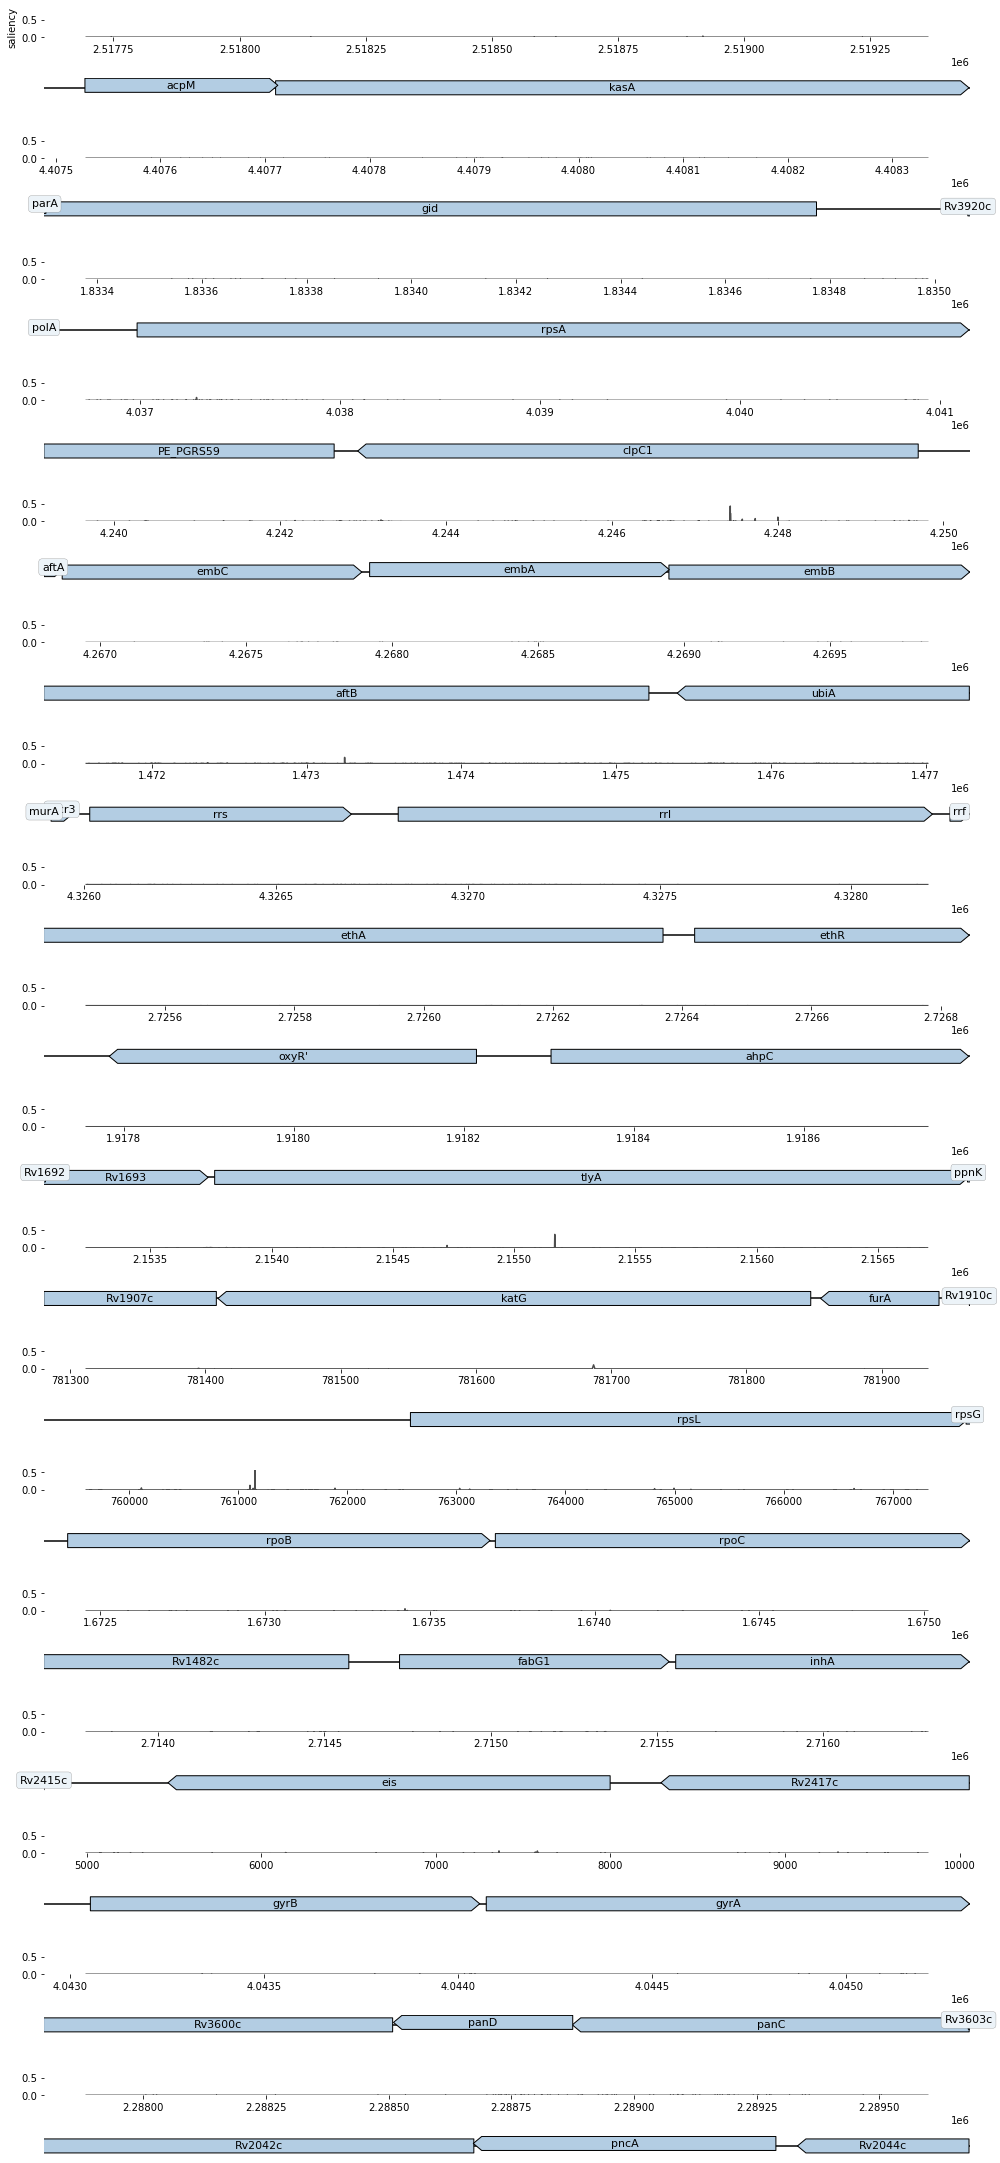

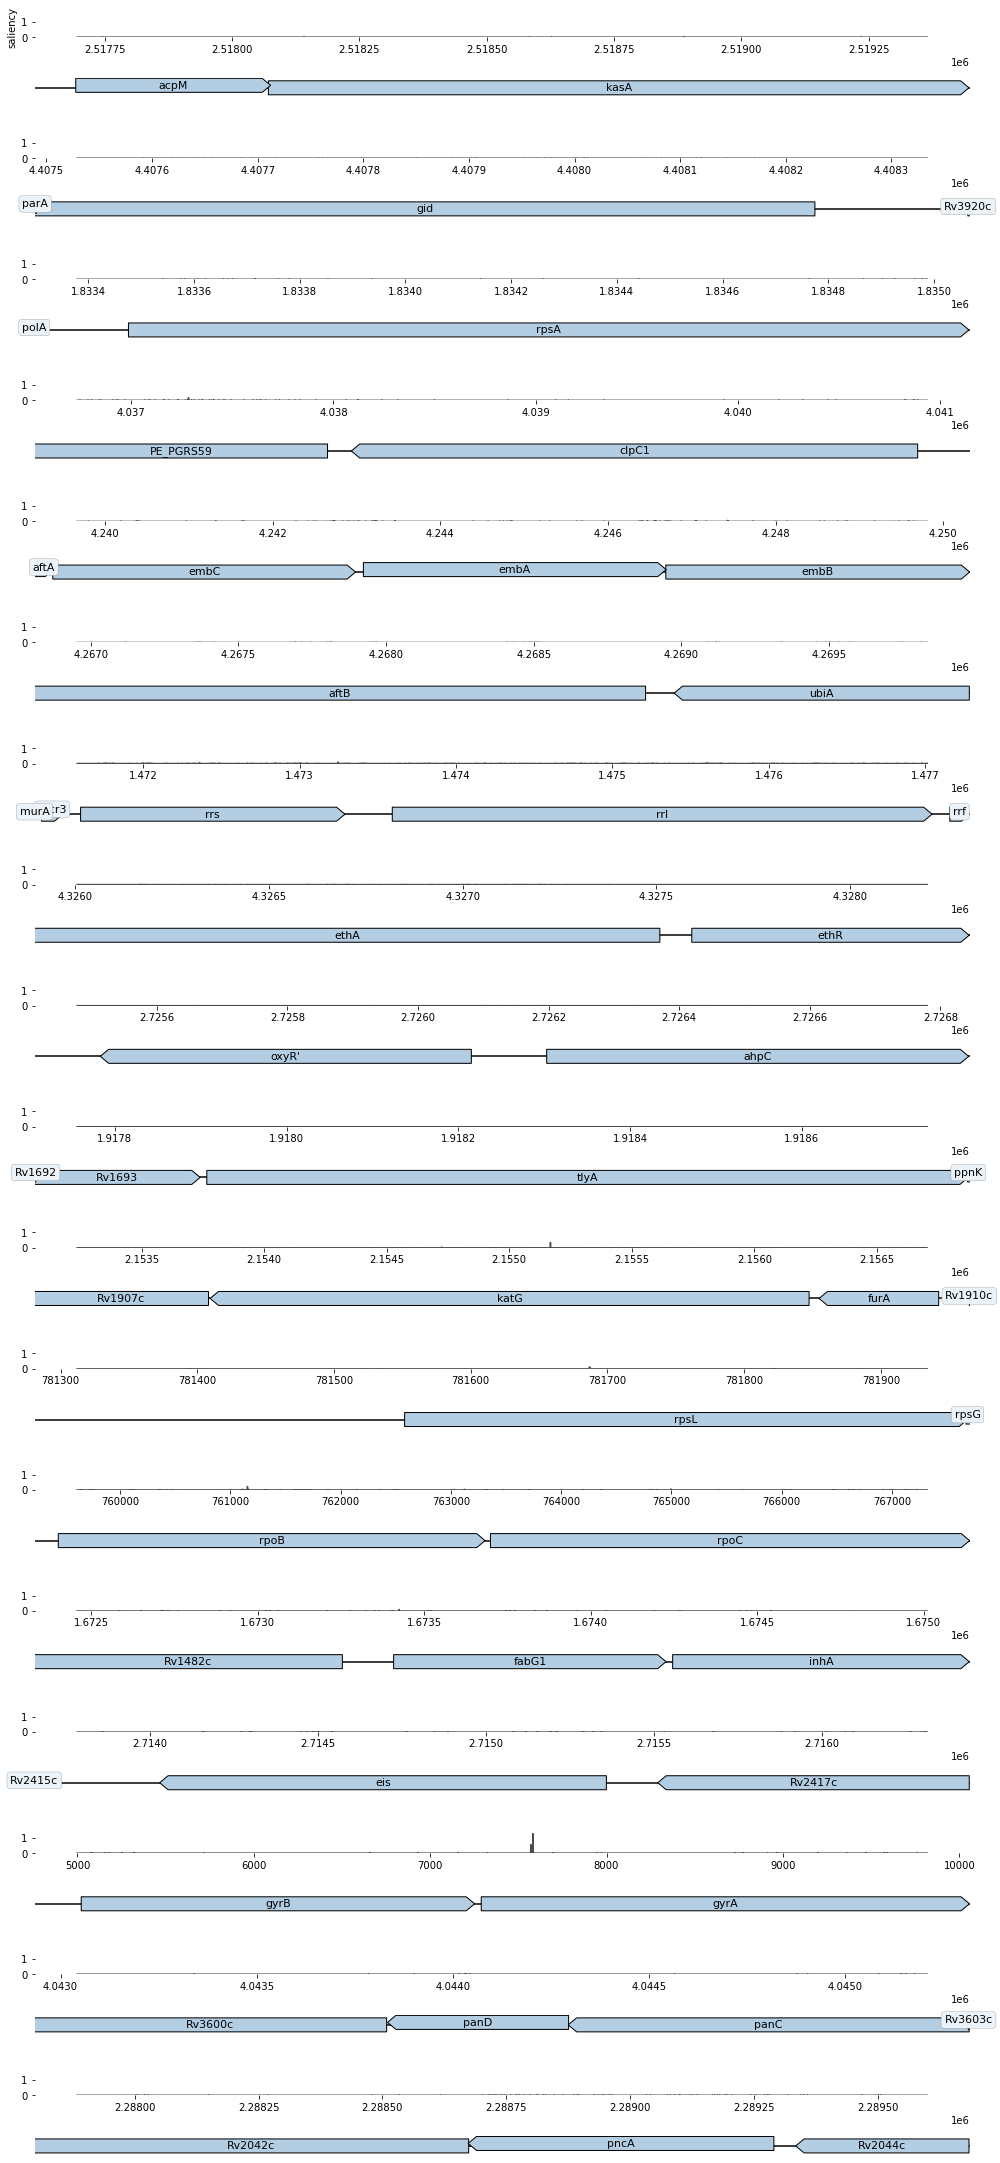

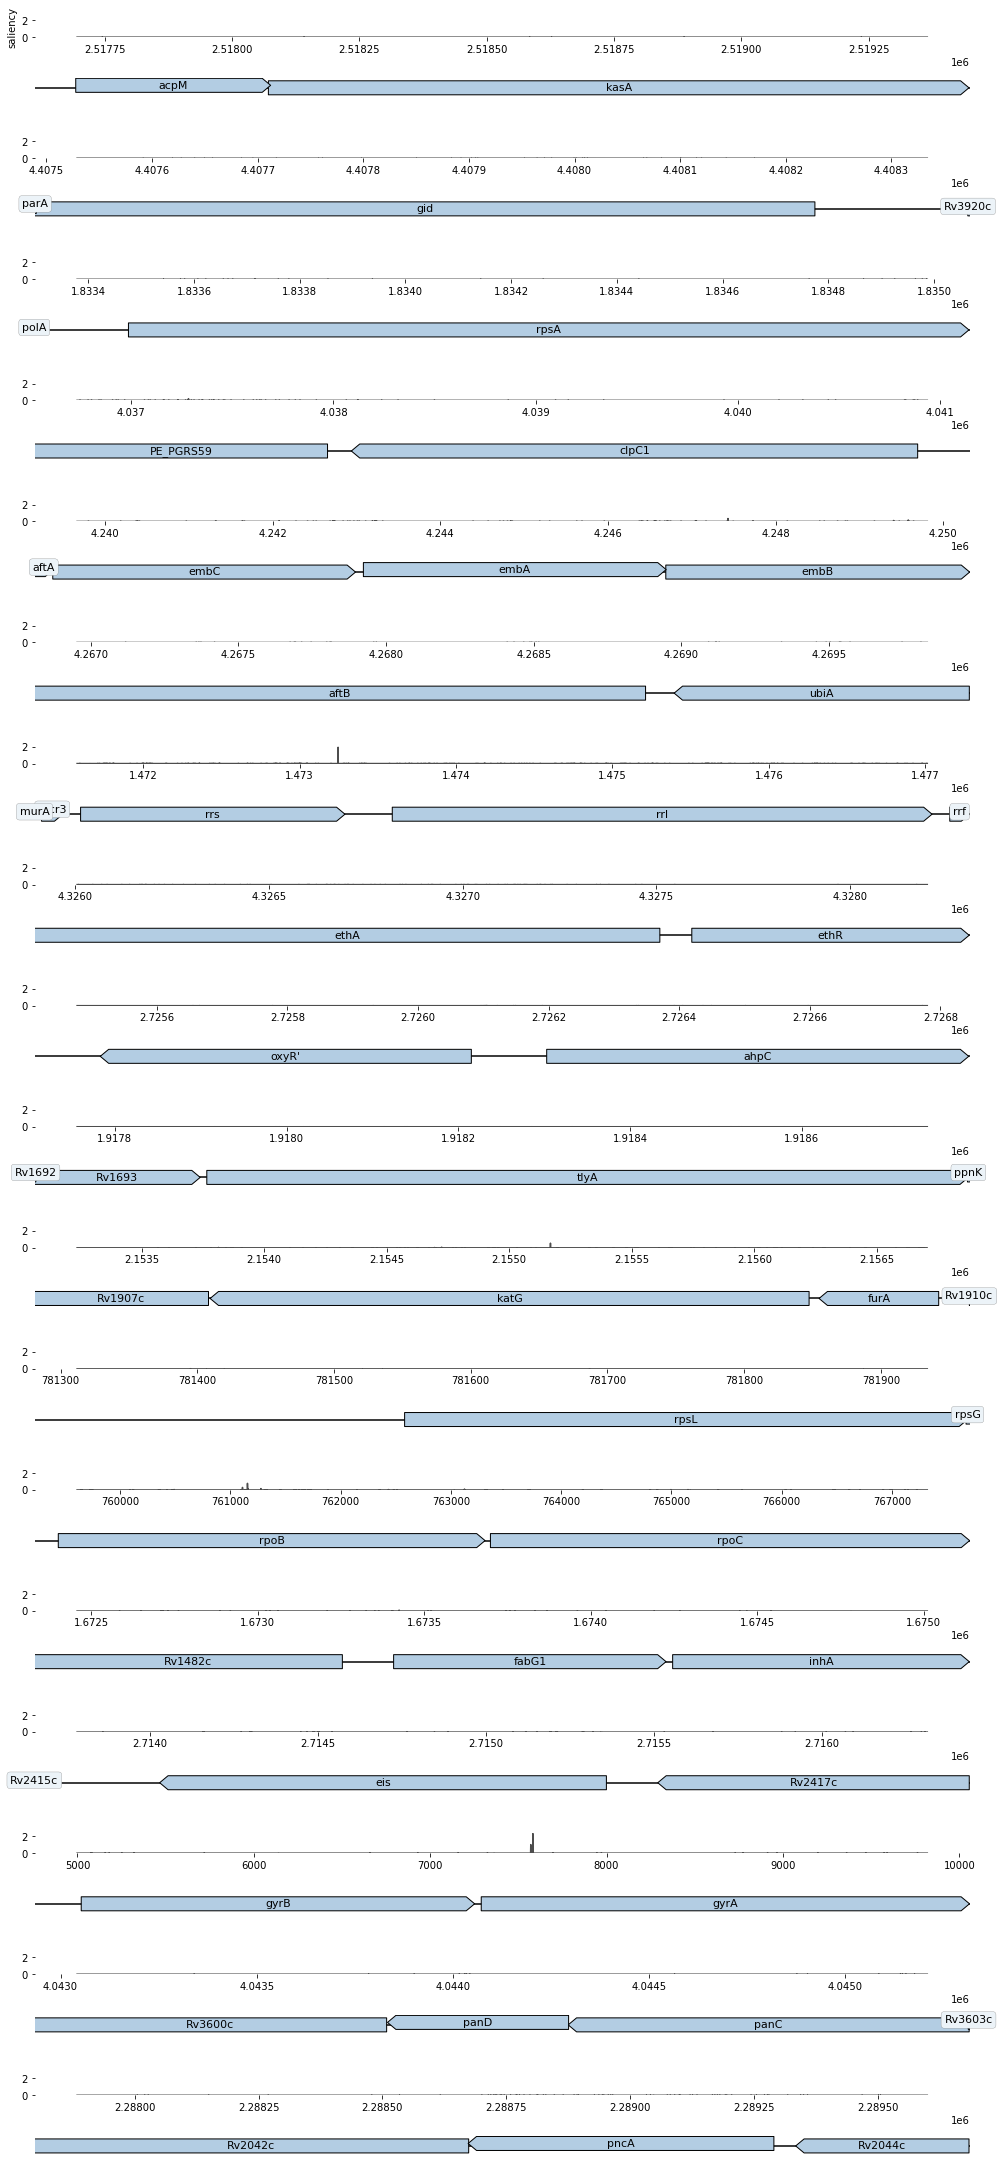

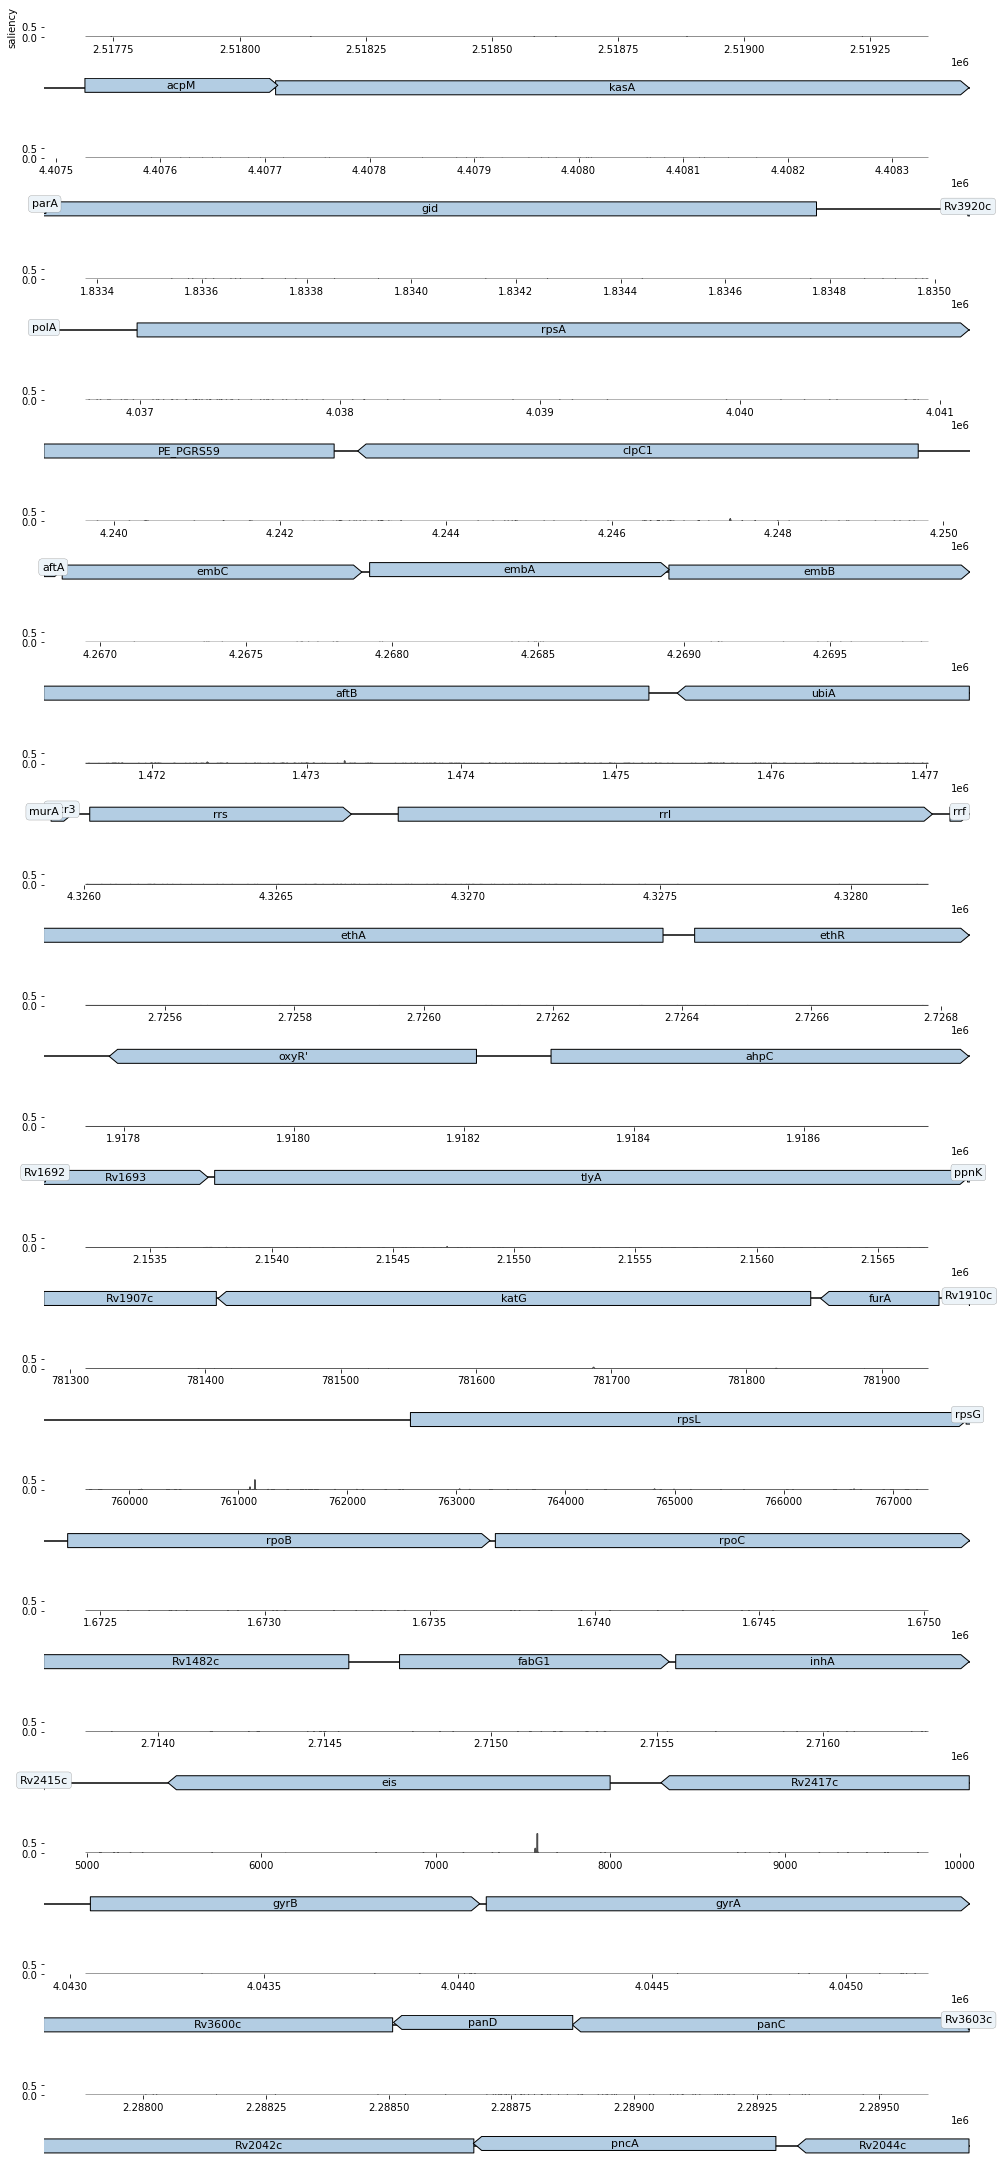

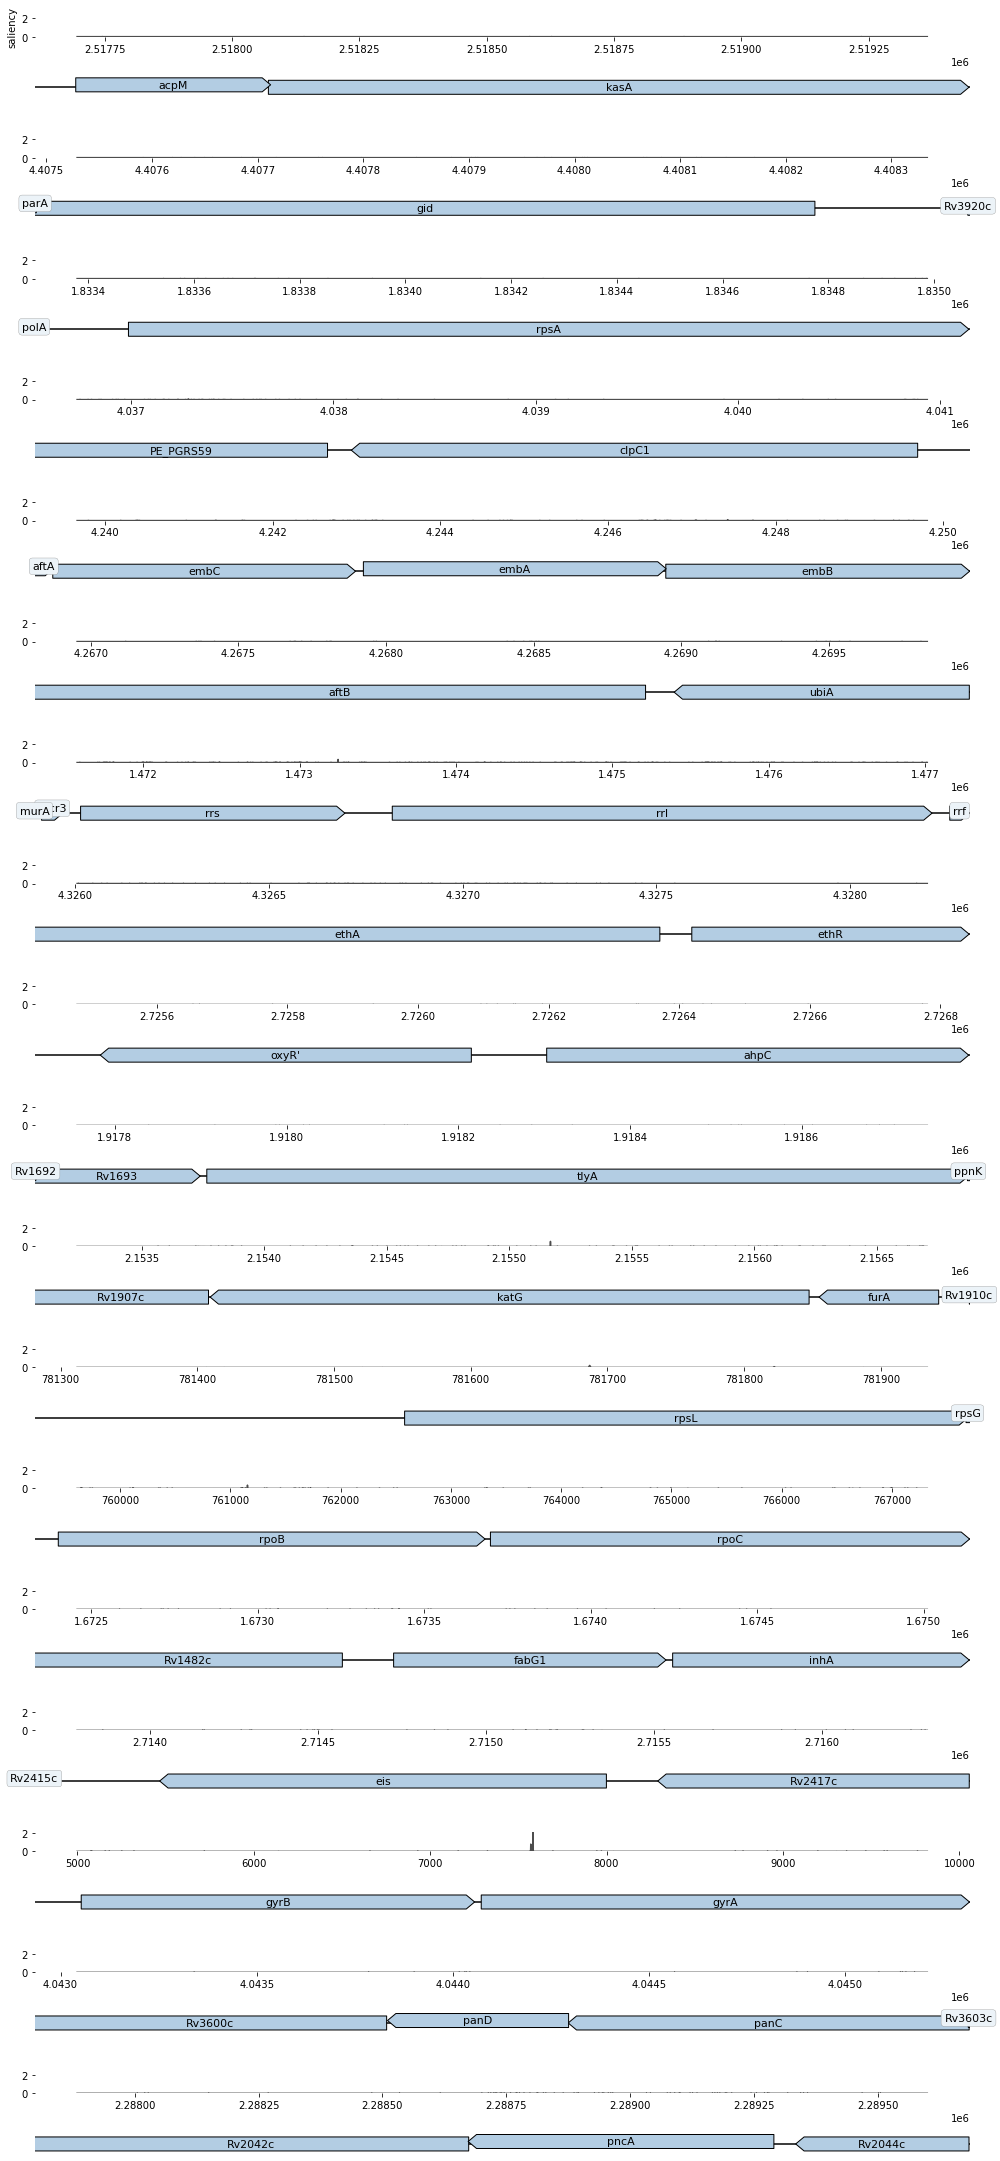

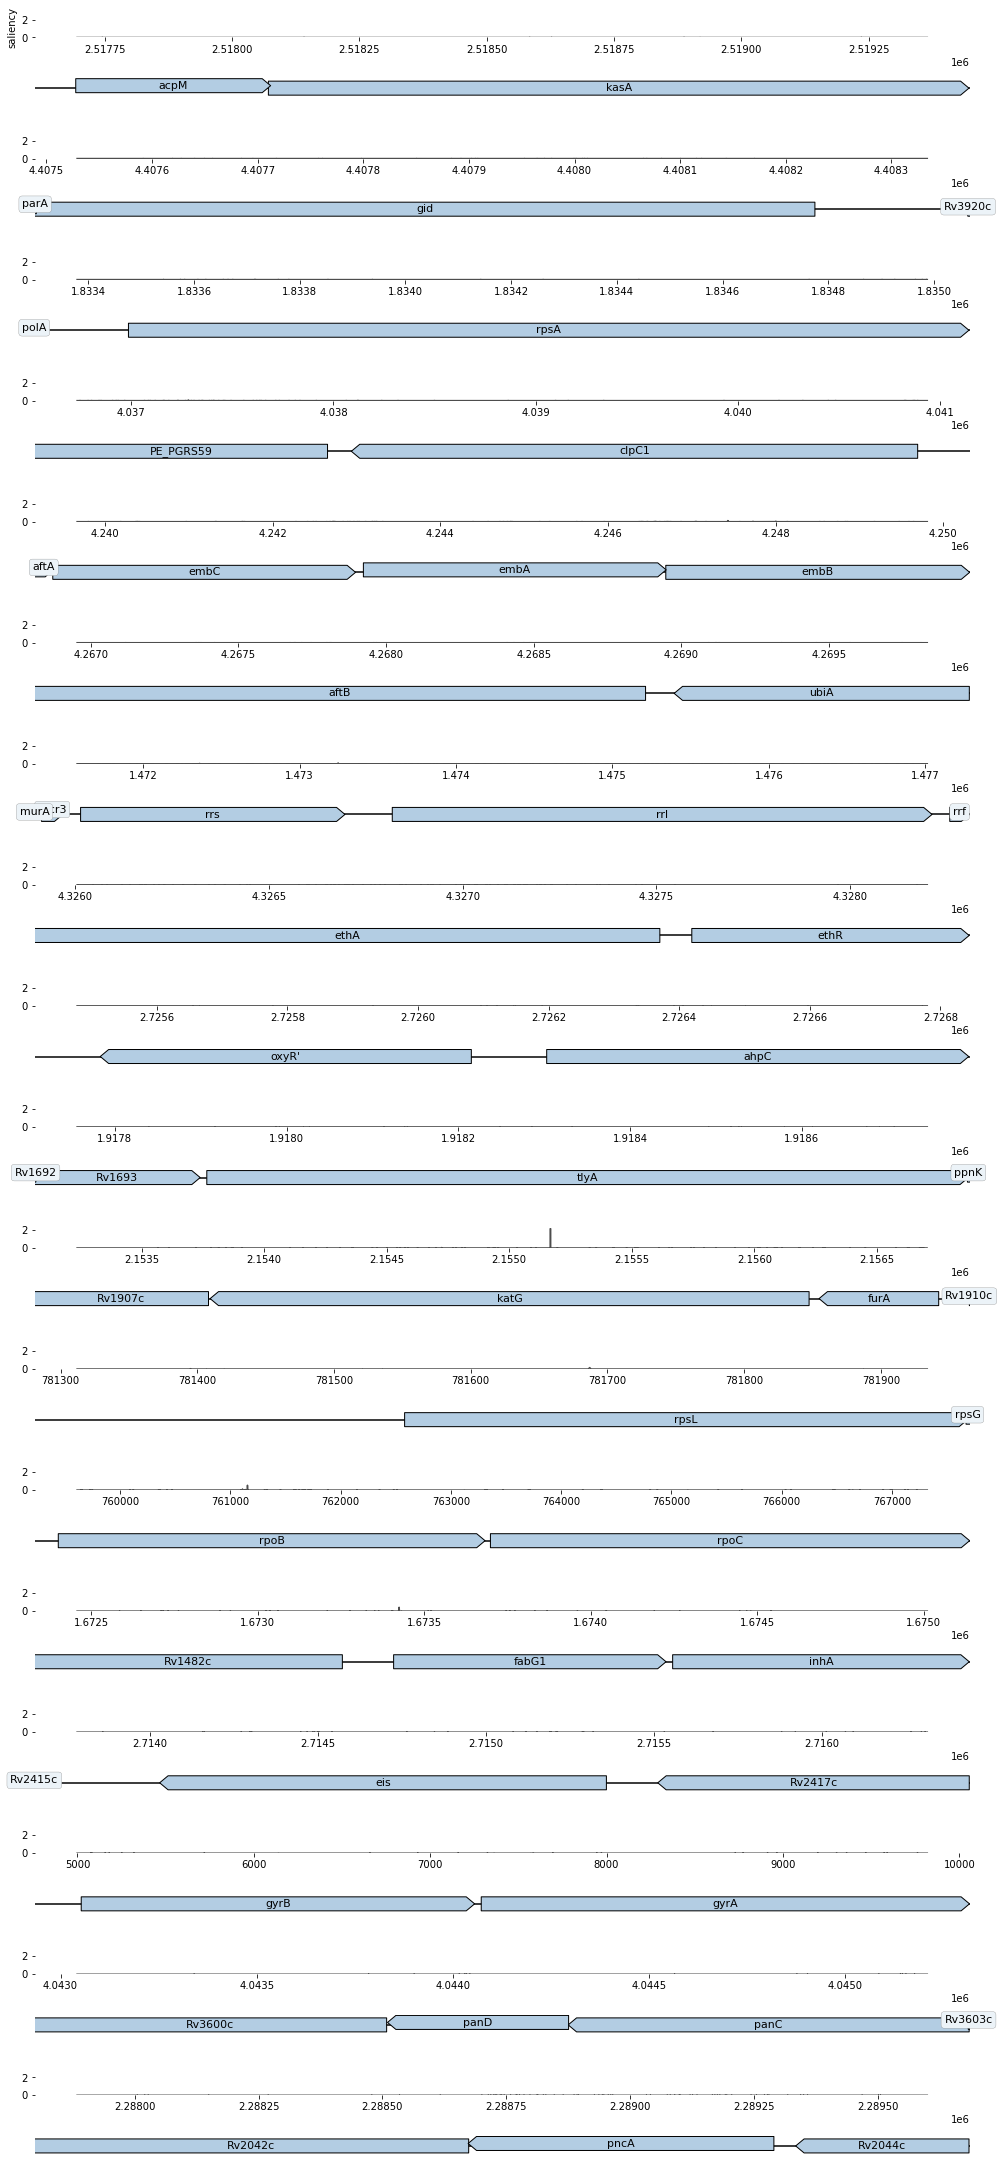

In [8]:
## Plotting each gene locus

!mkdir figures

record = SeqIO.read("../../../databases/GCF_000195955.2_ASM19595v2_genomic.gbff", "genbank")

graphic_record = MyCustomTranslator().translate_record(record)

for drug in drug_list:
    combined = np.load(f"{data_path}/md_cnn_saliency/{drug}_mean.npy")
    combined = np.abs(combined)
    allbound=np.max(combined)

    fig, ax = plt.subplots(coords.shape[1]*2, 1, figsize=(14,30))
    axes=ax.flatten()

    for i,name in enumerate(name_list):

        ax_coords = axes[(i)*2+1]
        ax_saliency = axes[(i)*2]
        length =int(coords[0,i])+ name_to_len[name]

        cropped_record = graphic_record.crop((int(coords[0,i]), int(coords[0,i])+name_to_len[name]))

        cropped_record.plot(
            ax=ax_coords, with_ruler=False,
        )

        ax_coords.set_xlim([int(coords[0,i]), int(coords[0,i])+ name_to_len[name]])
        ax_coords.set_ylim([-4,4])

        ax_saliency.plot(coords[:,i], combined[:,i], color="#4d4d4d") 
        ax_saliency.set_ylim([0, allbound+0.01*allbound])

        sns.despine(ax=ax_saliency, top=True, right=True, left=True, bottom=True)


    ax[0].set_ylabel("saliency")

    #plt.suptitle(f"{drug.upper()} Saliency Map")
    plt.tight_layout()
    plt.savefig(f"figures/MD-CNN_{drug}_mean.pdf") 


mkdir: figures: File exists


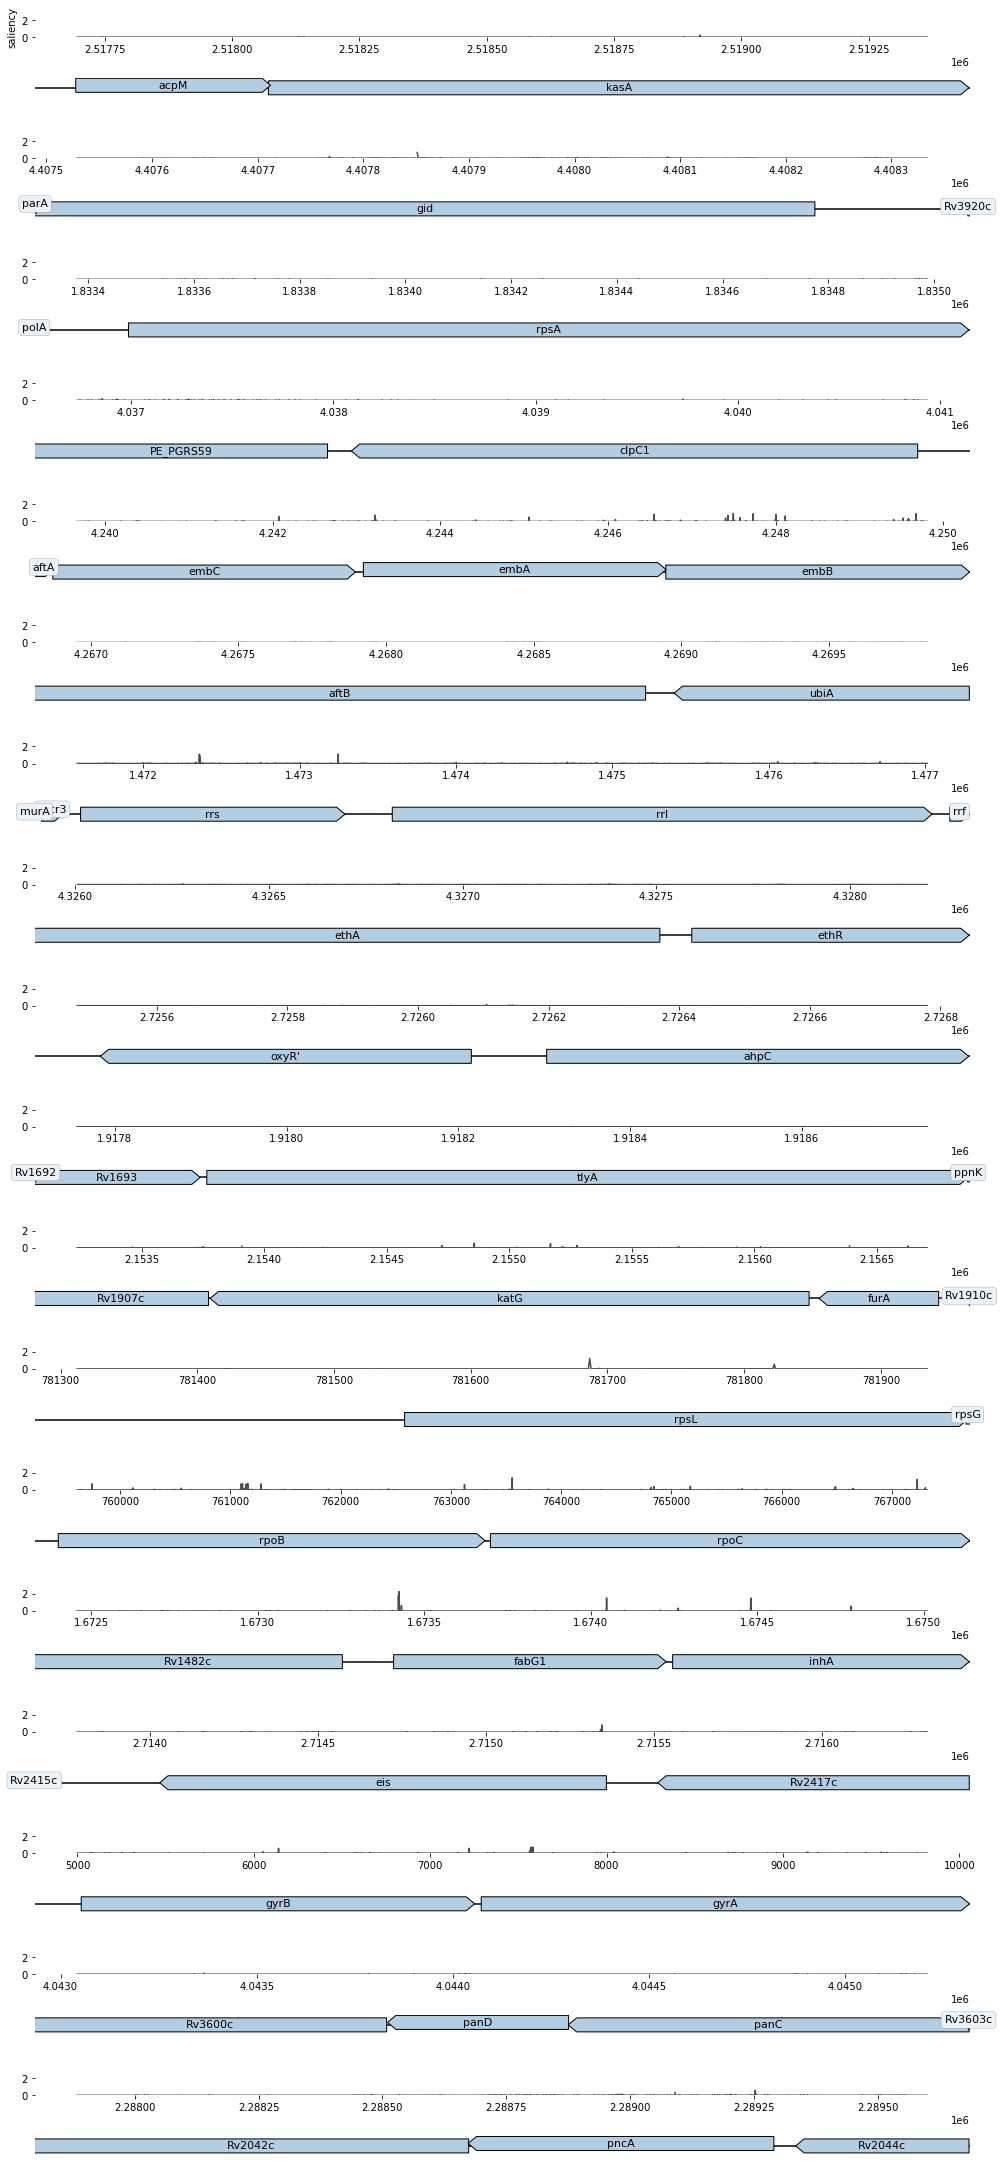

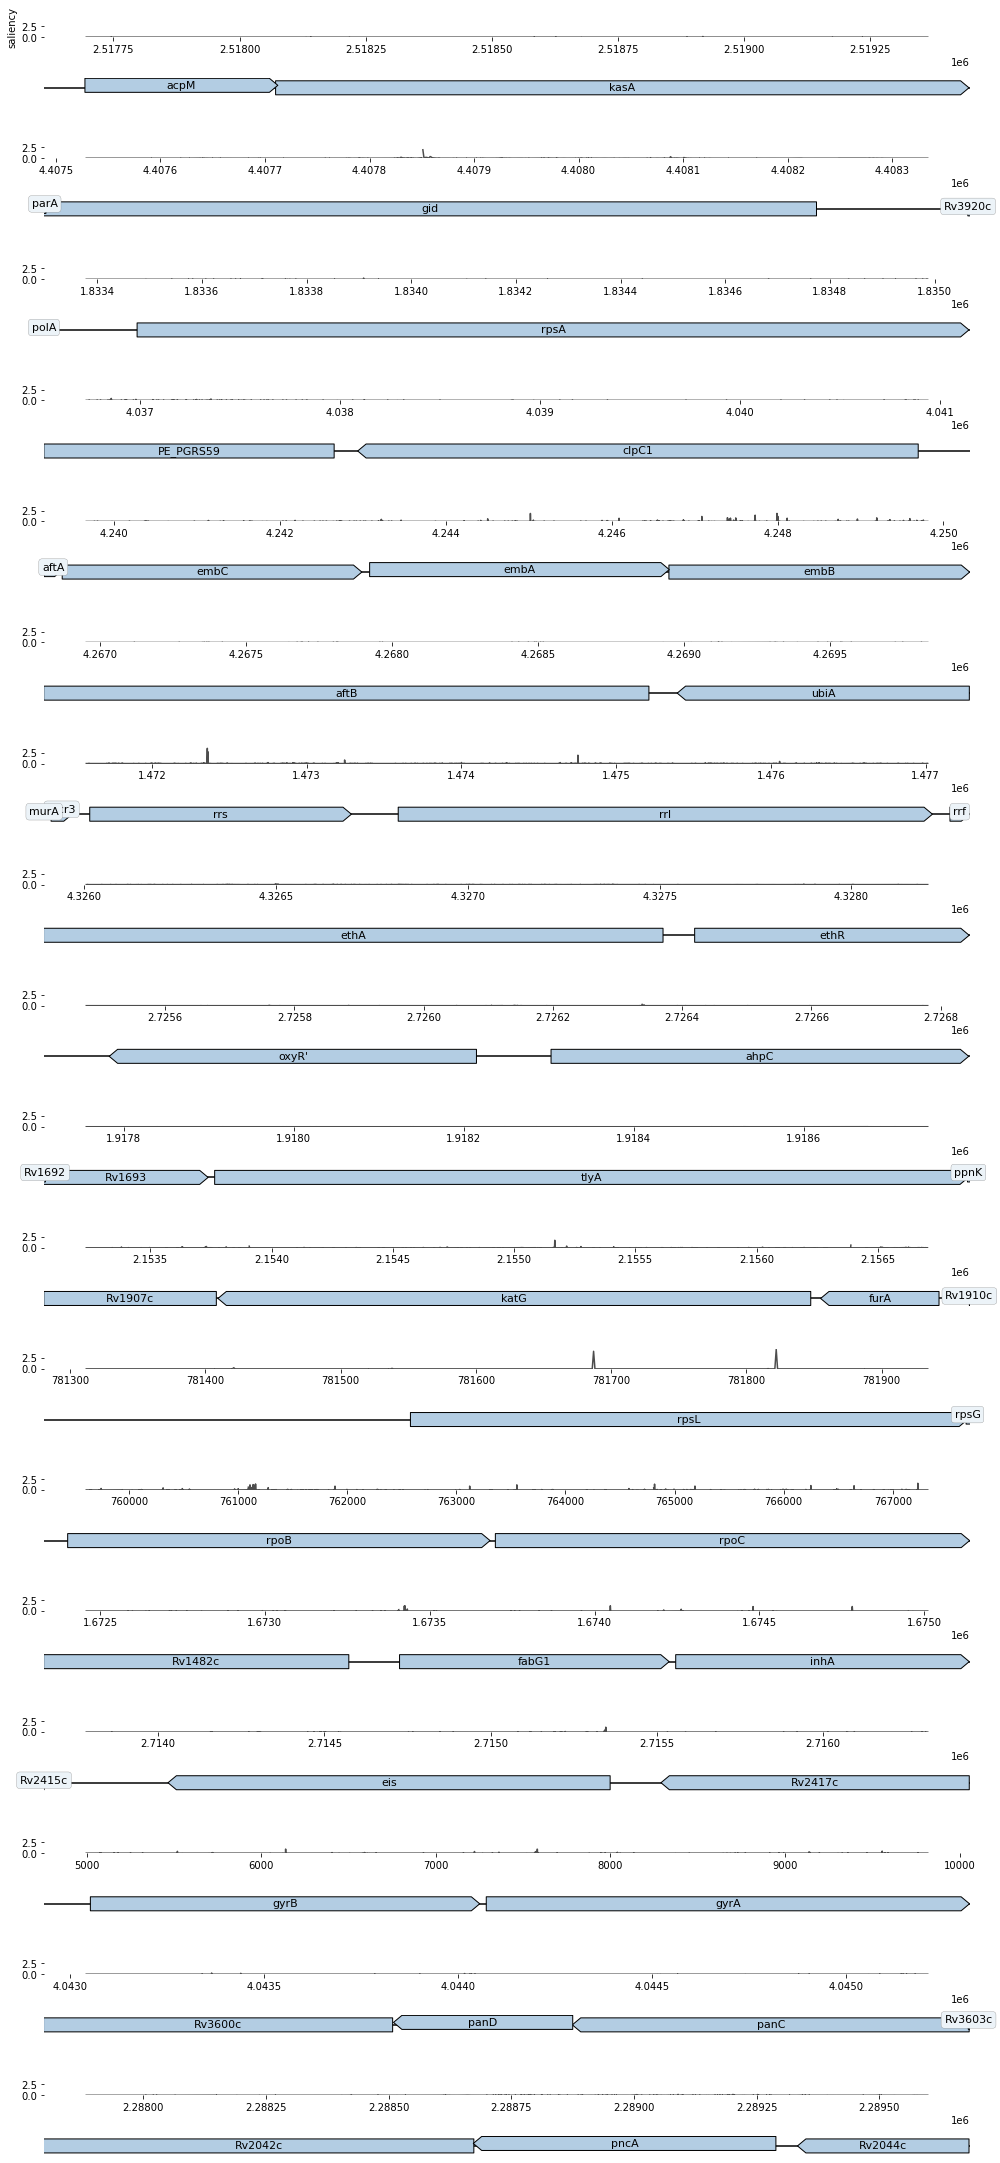

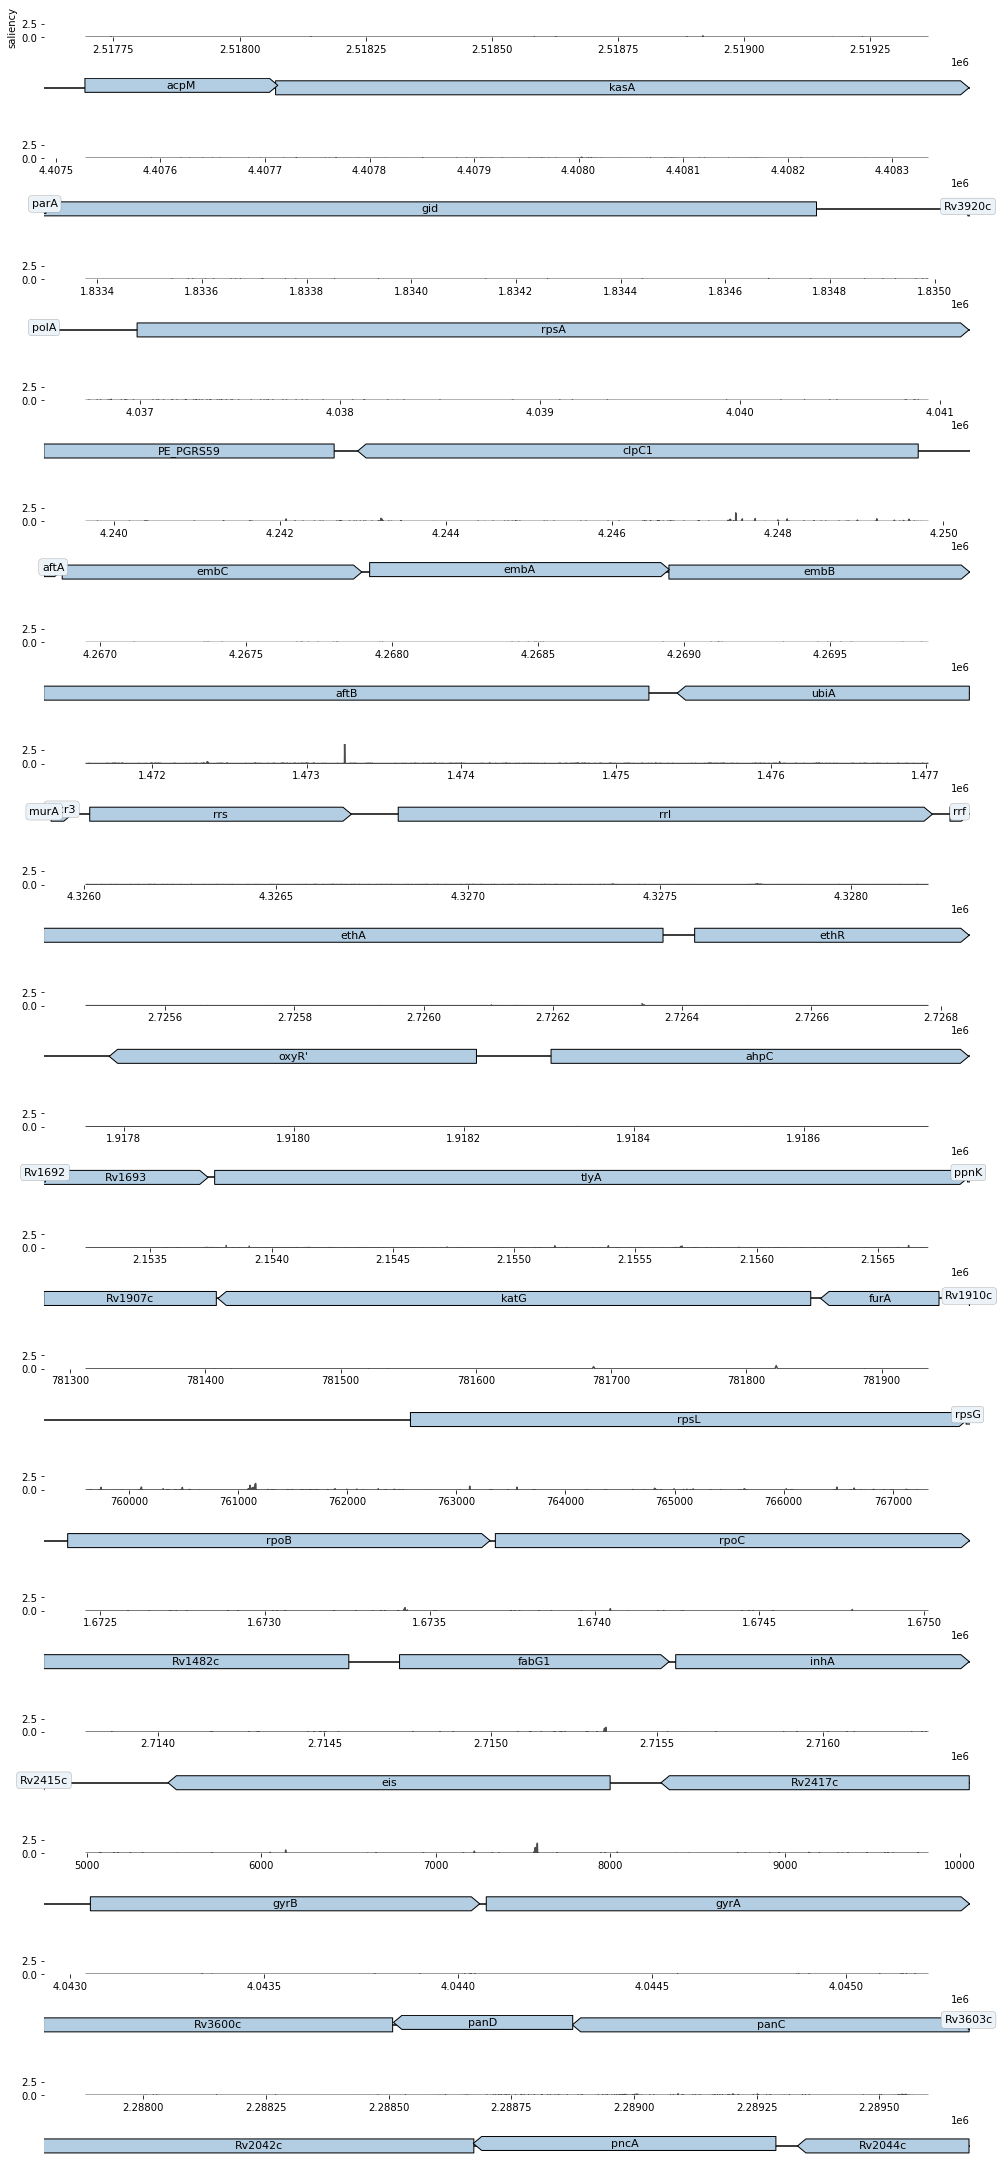

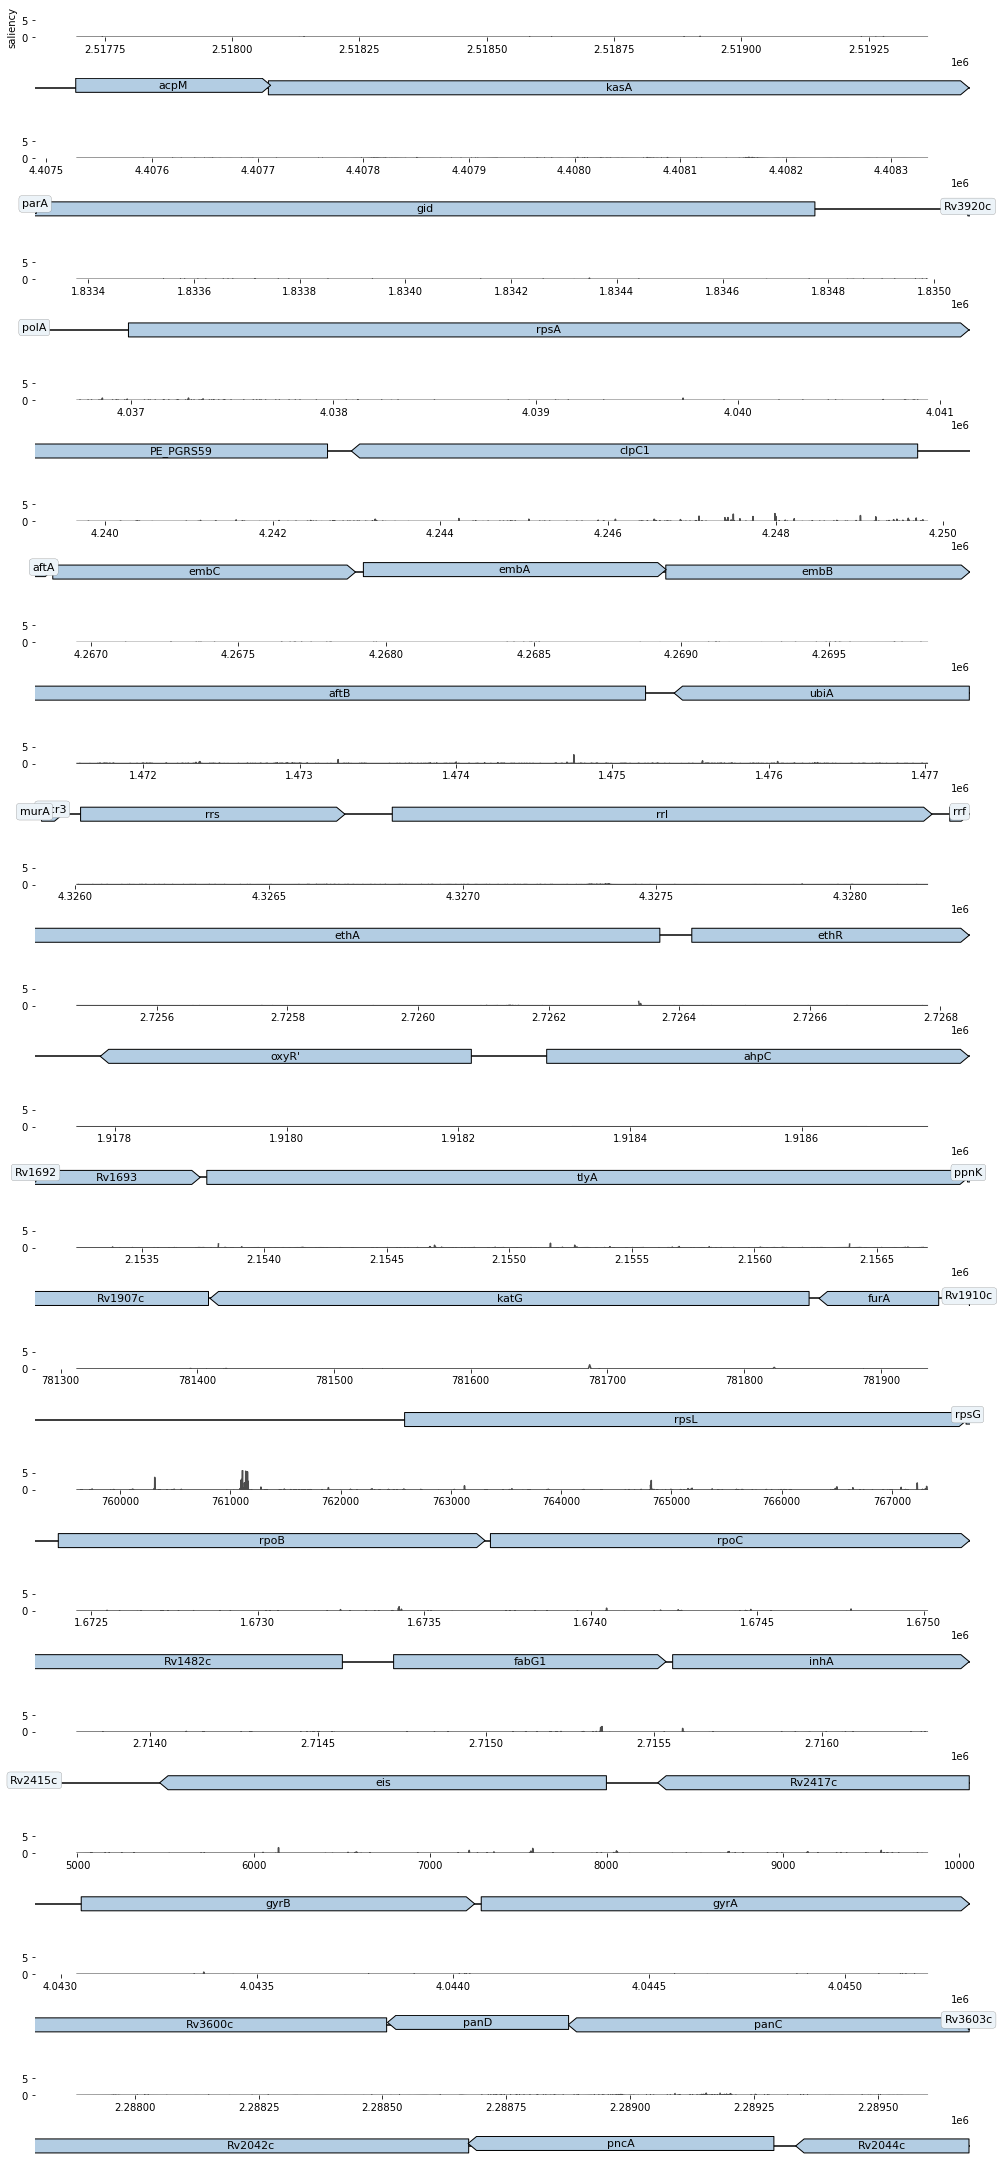

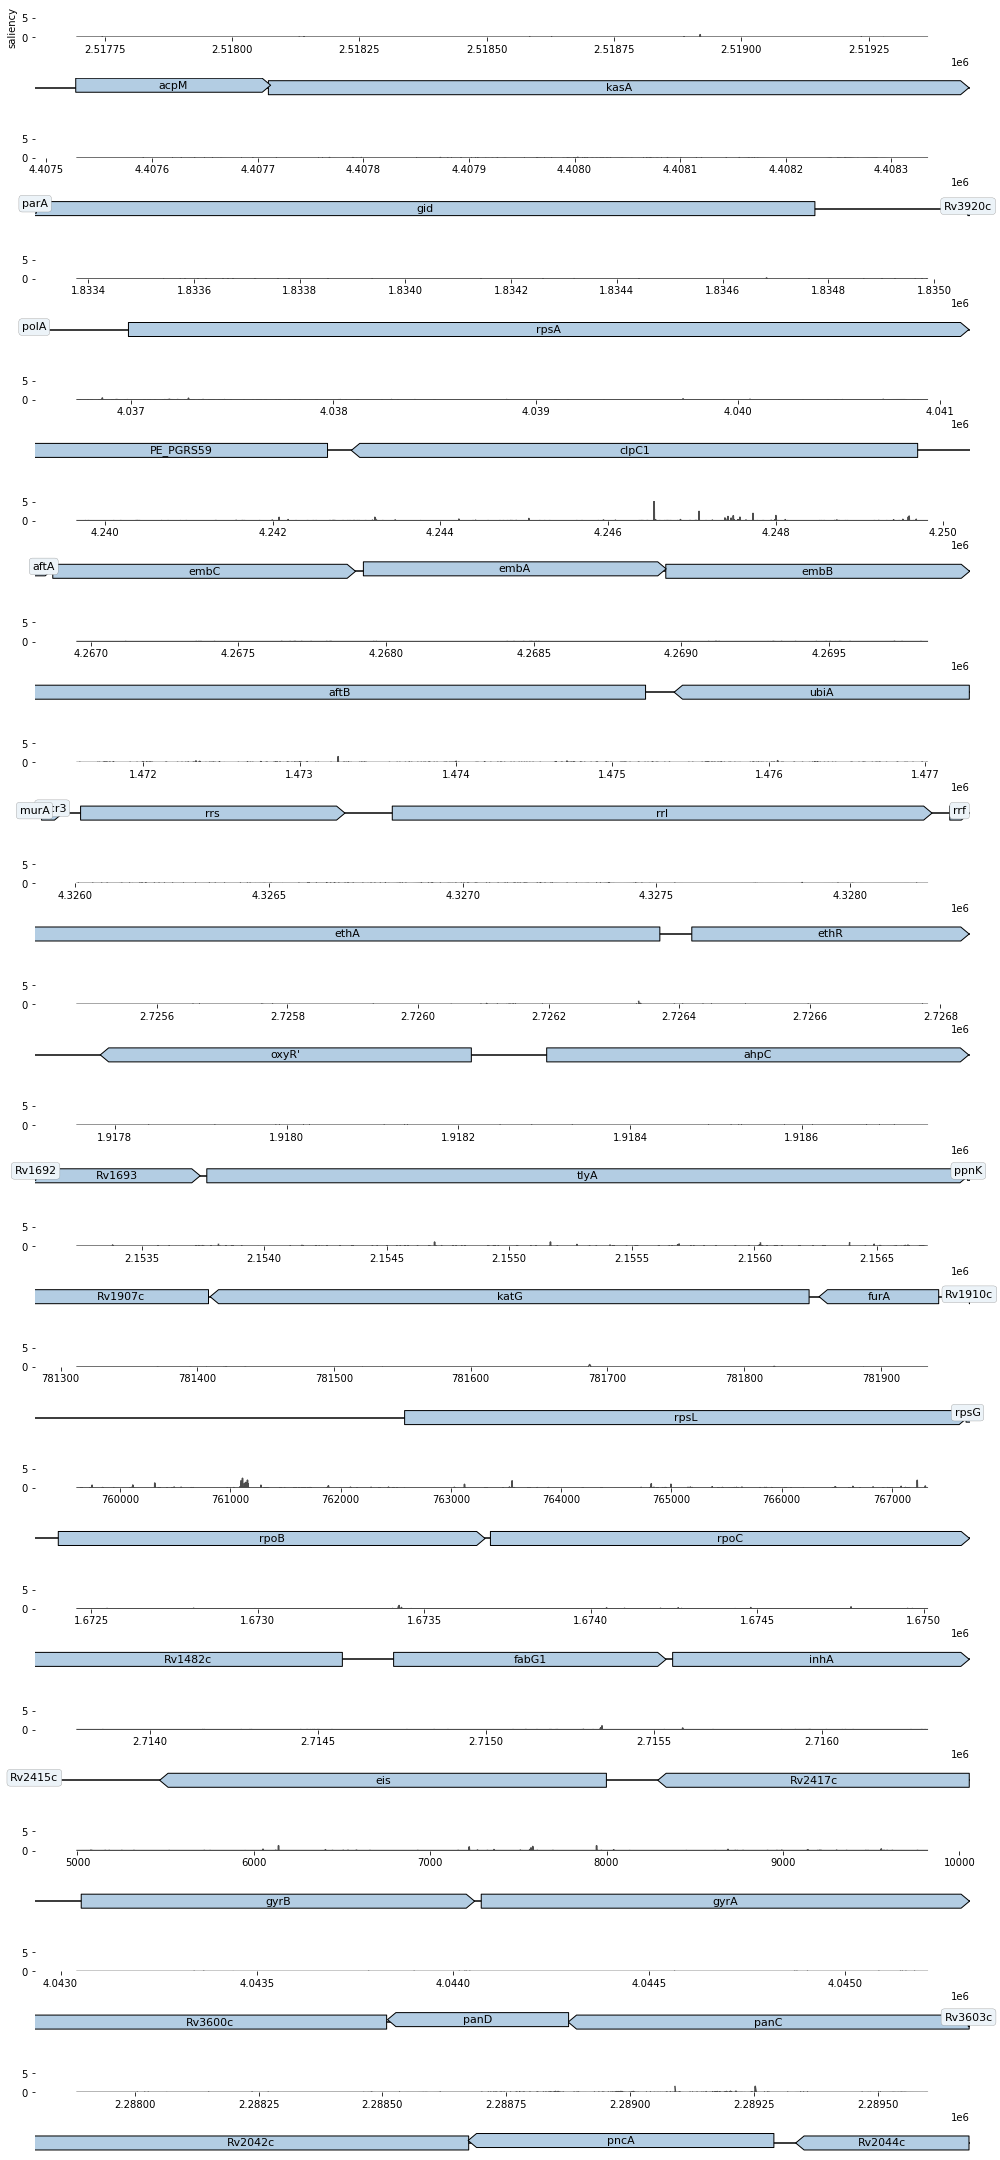

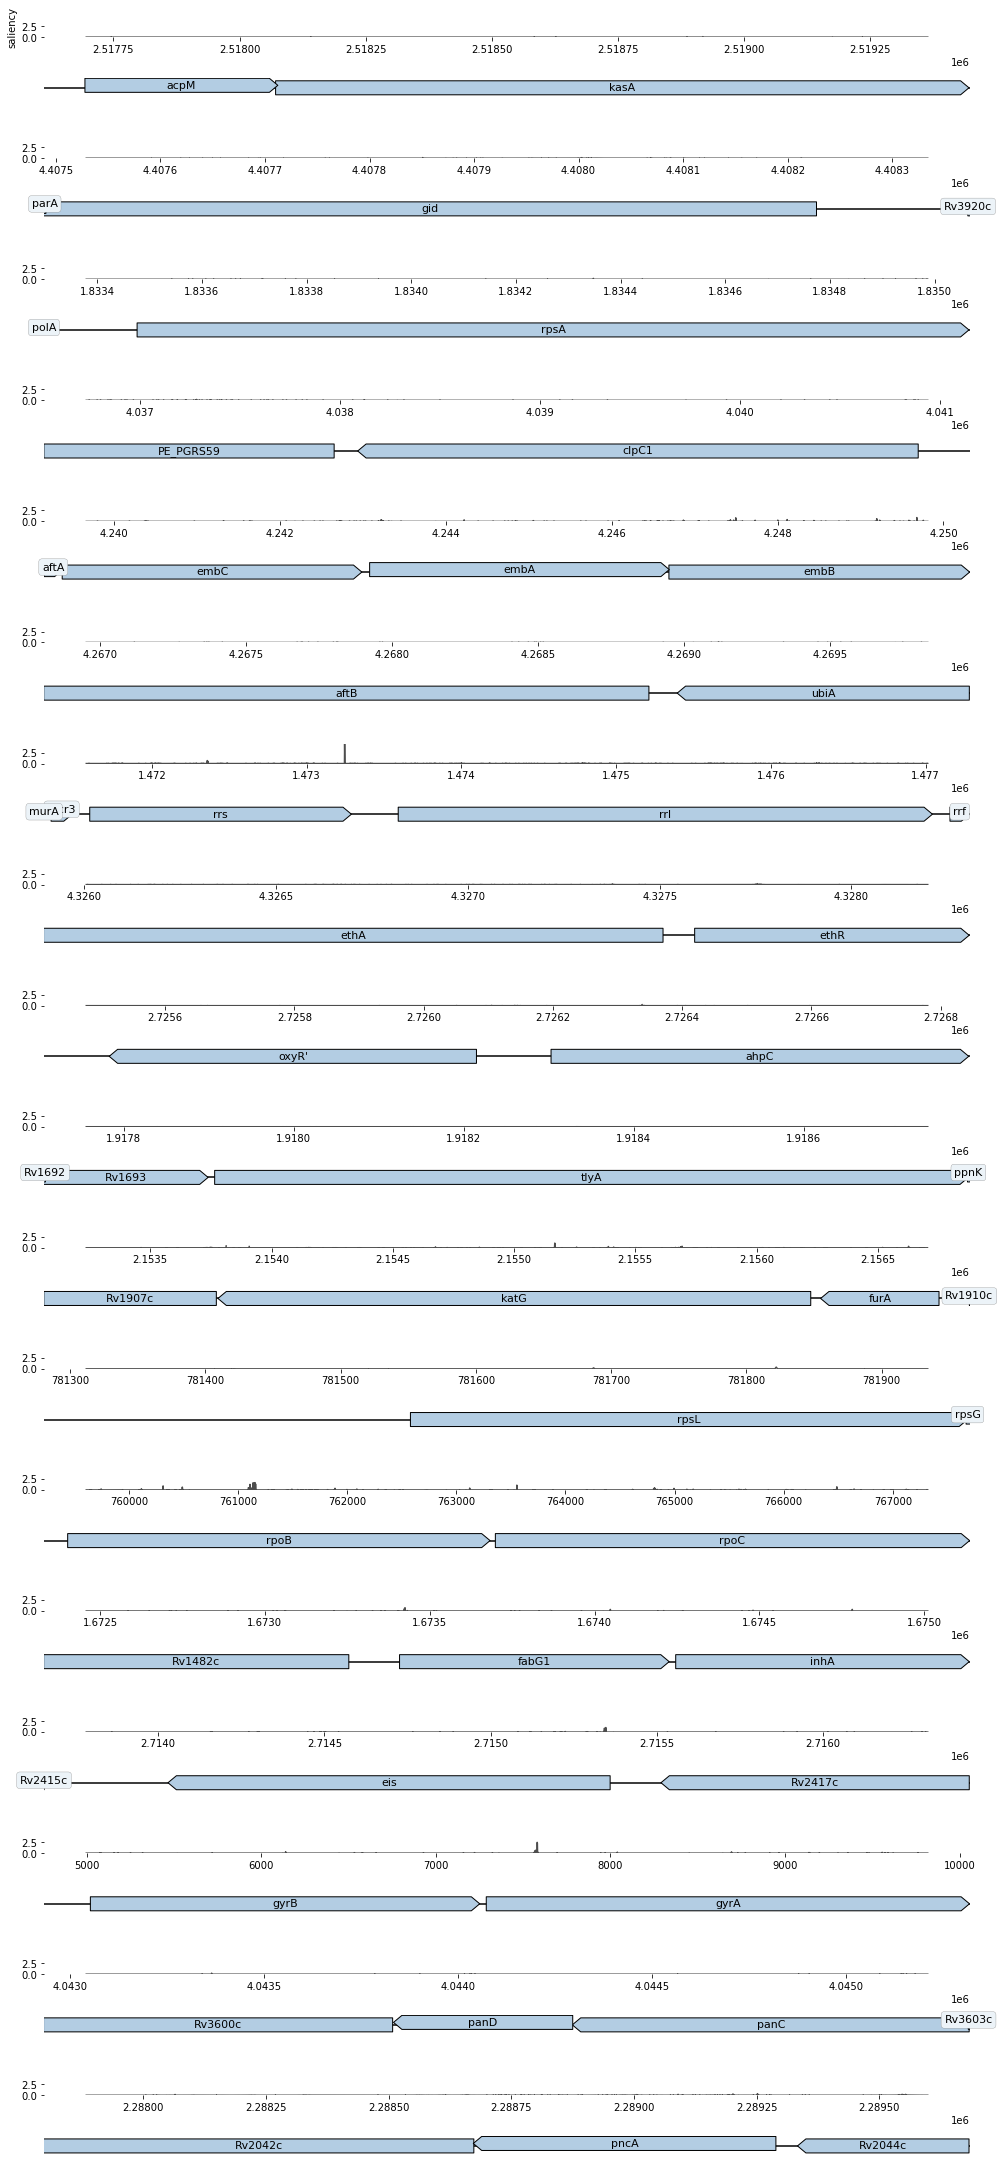

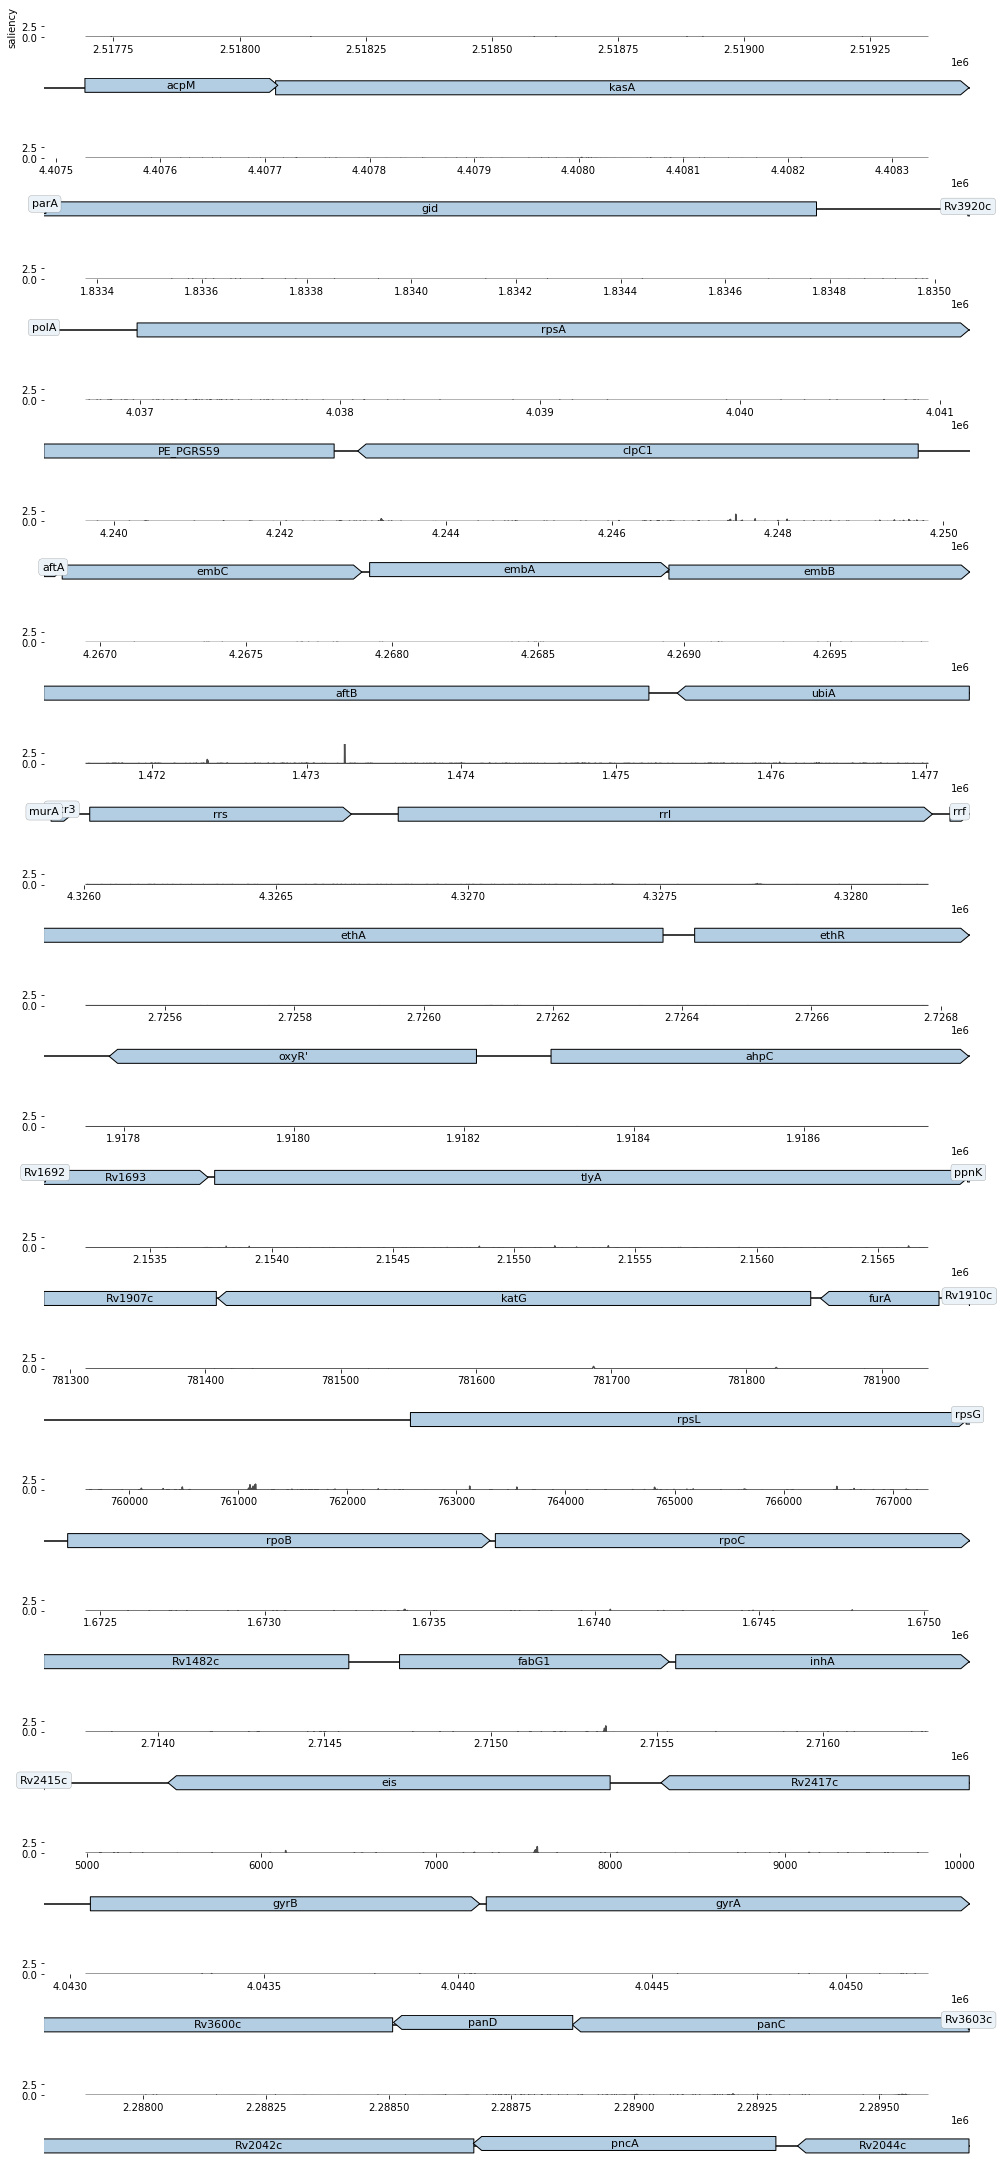

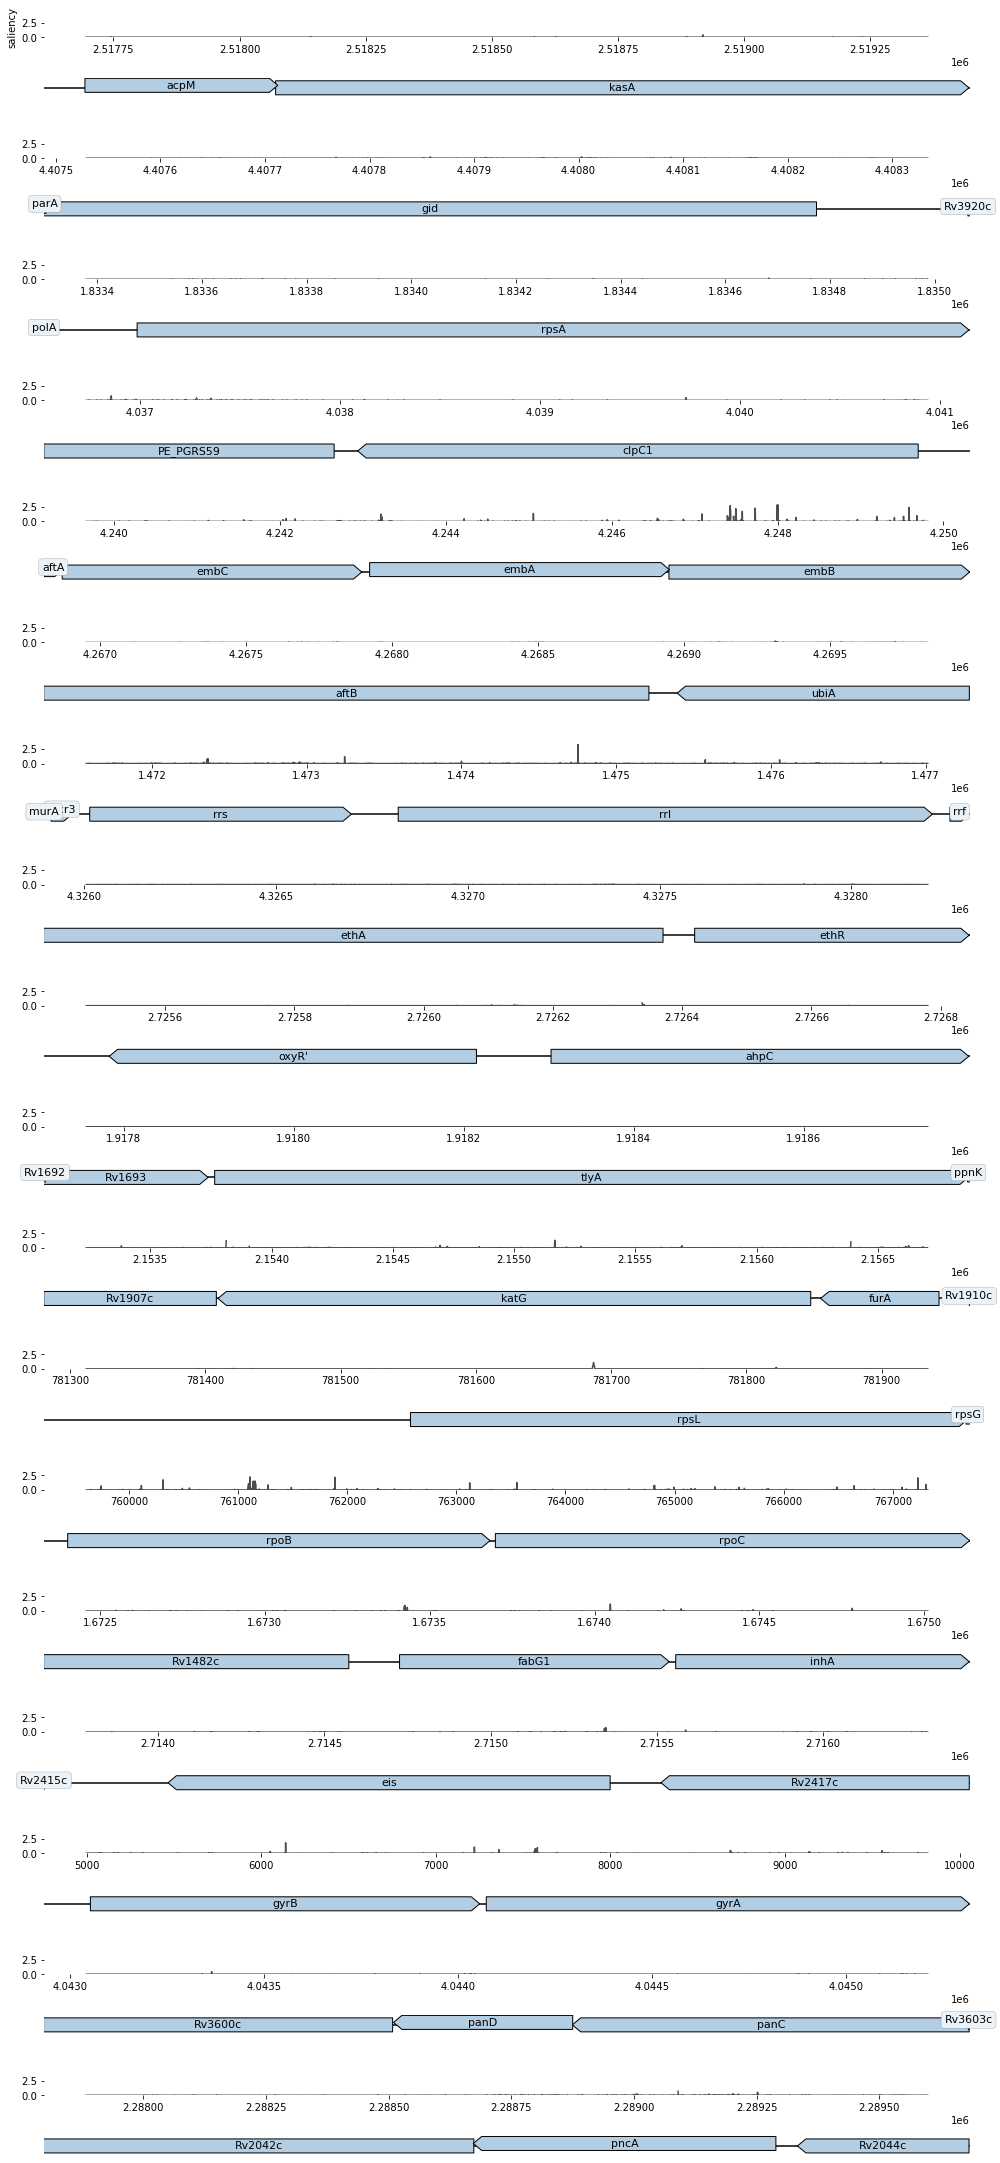

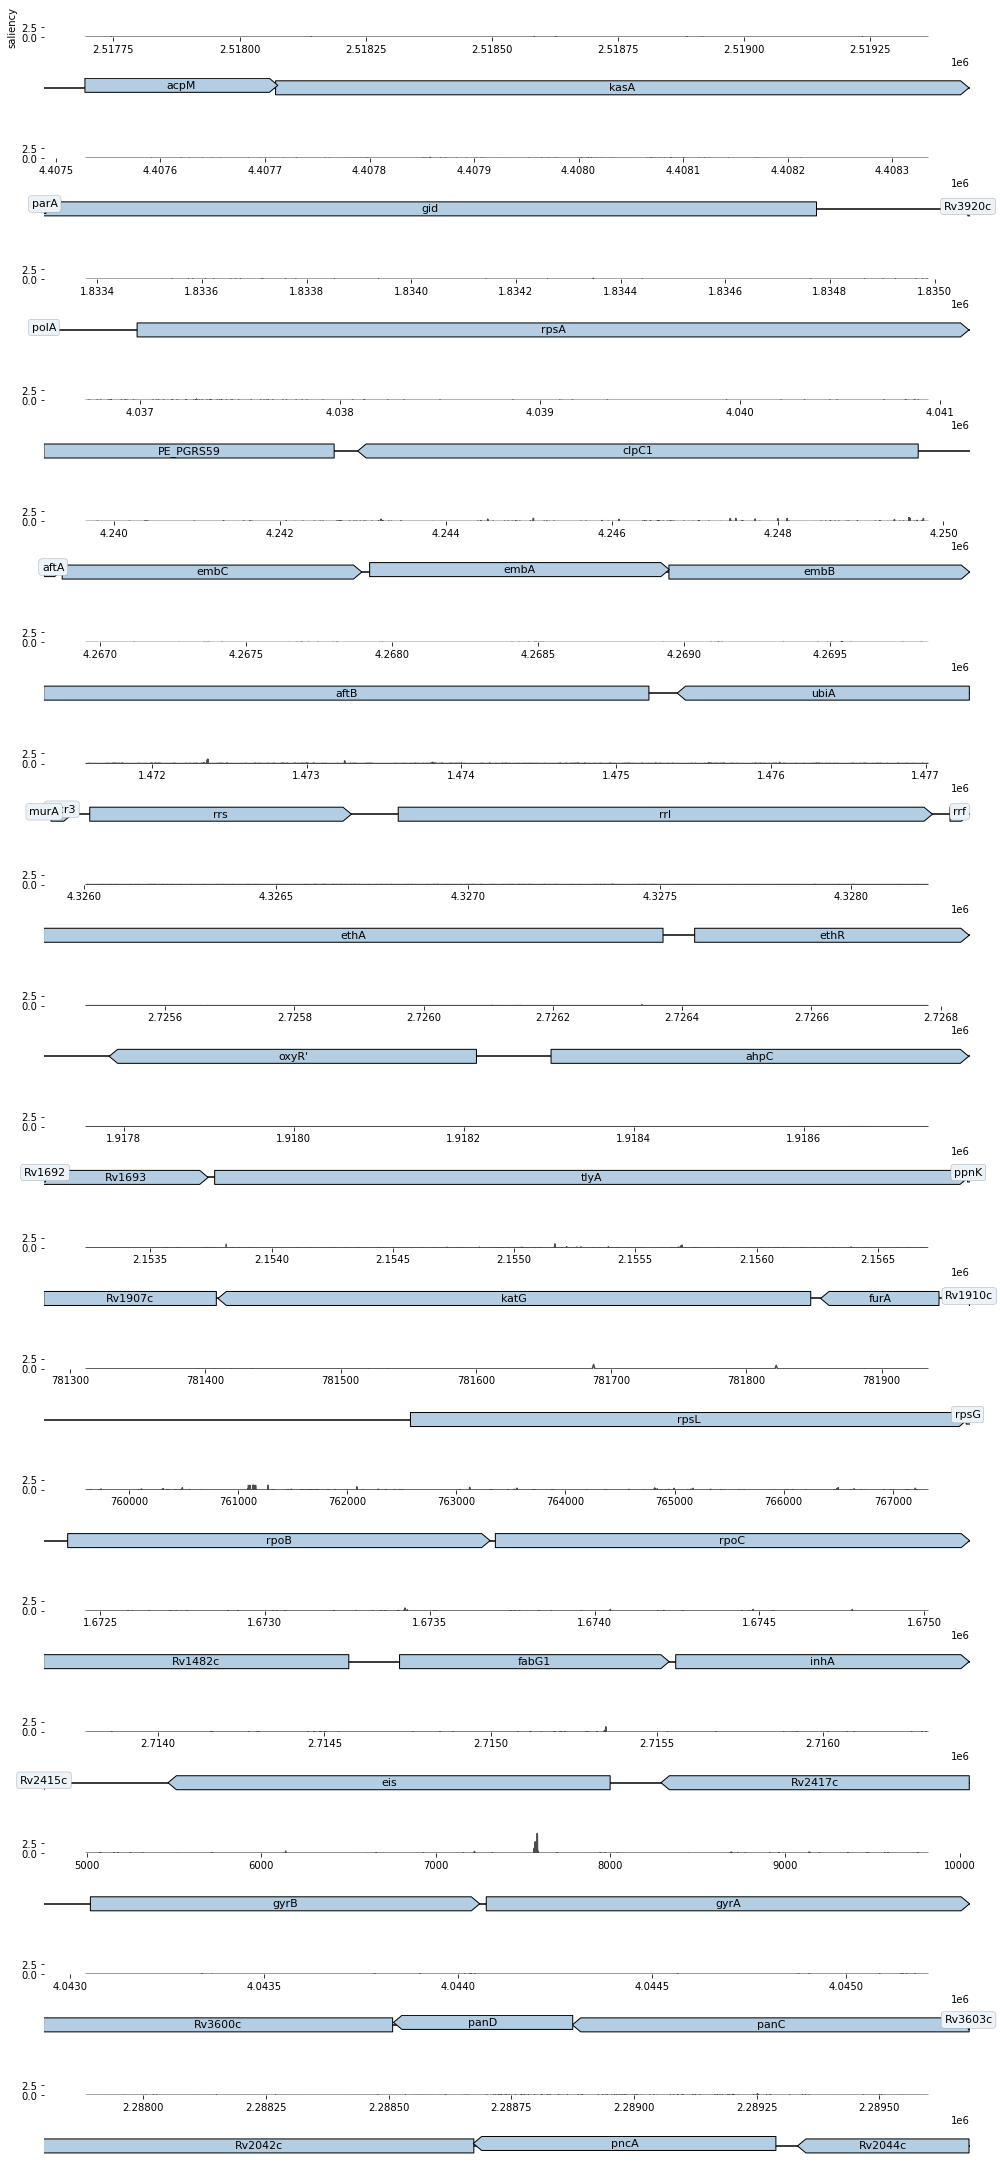

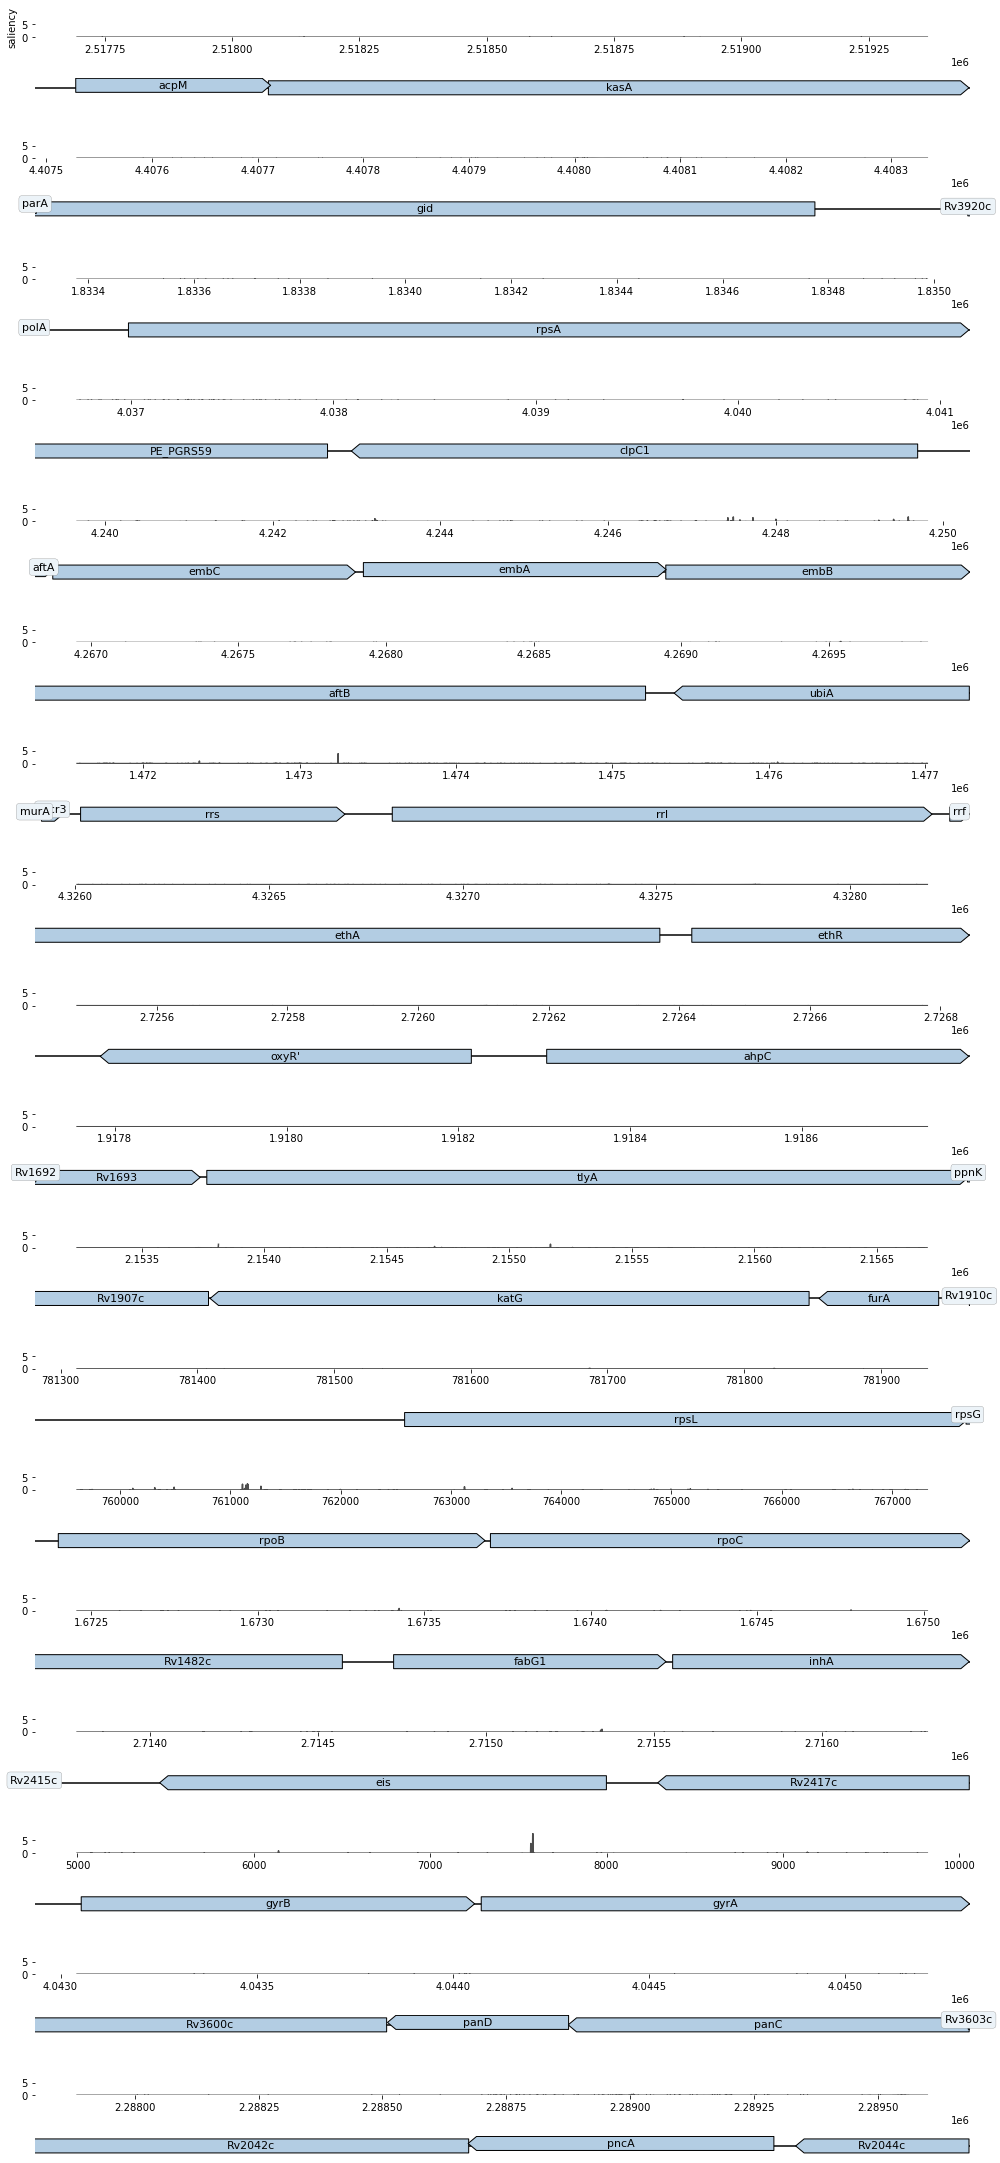

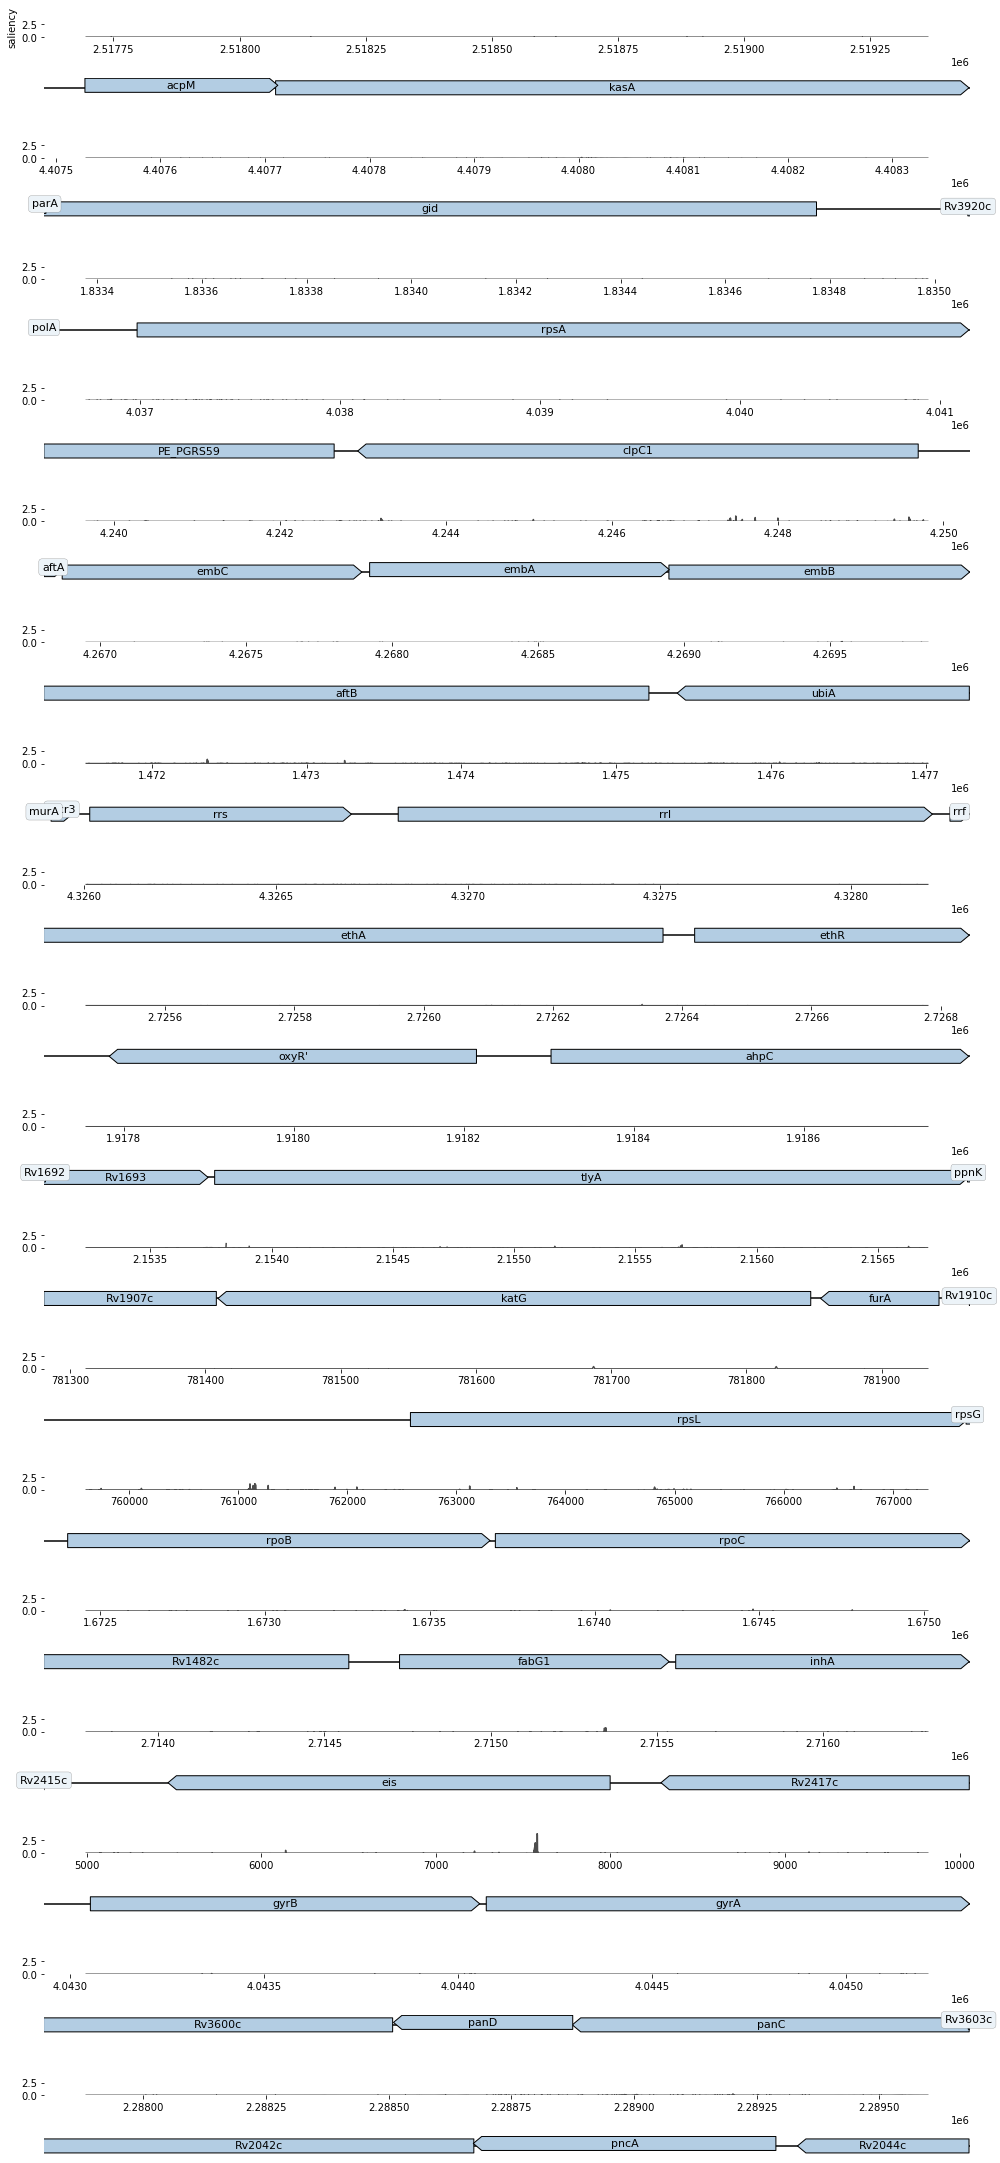

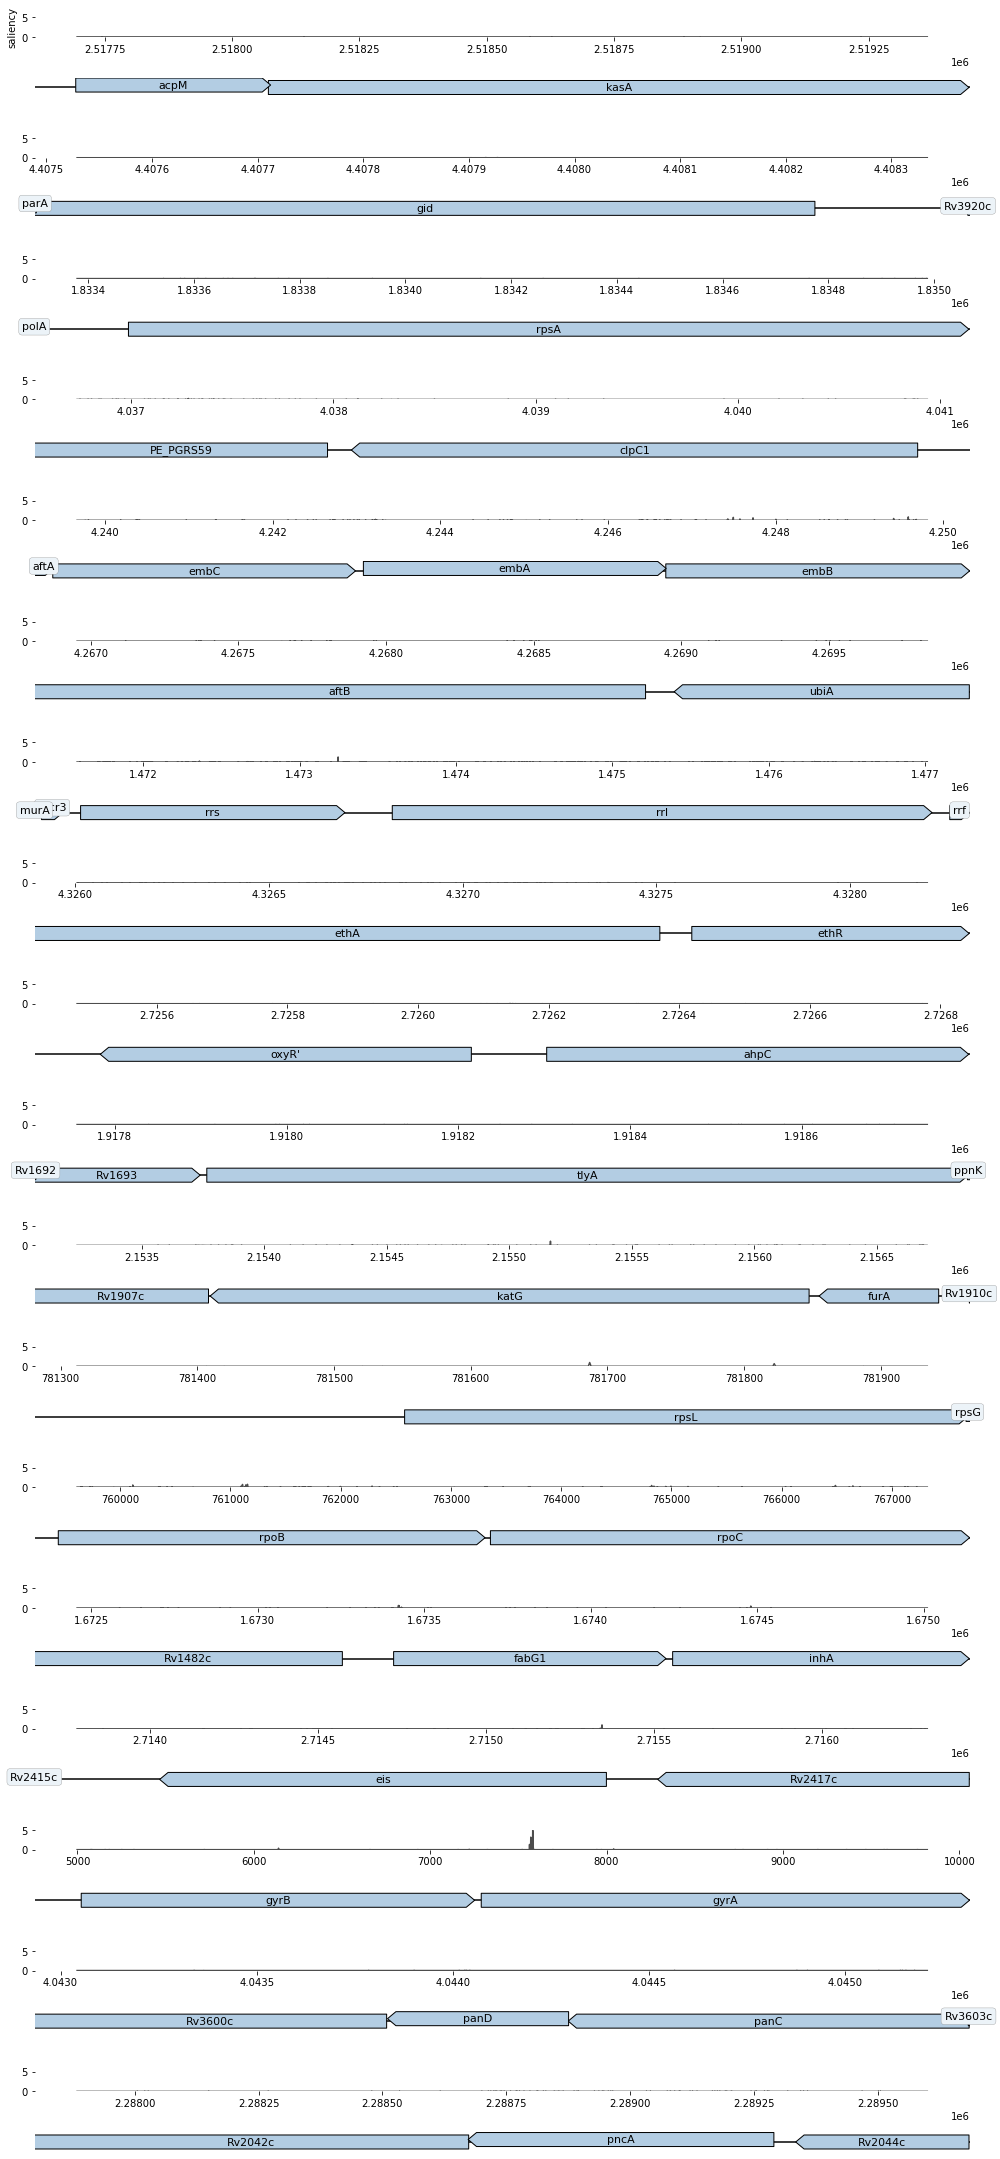

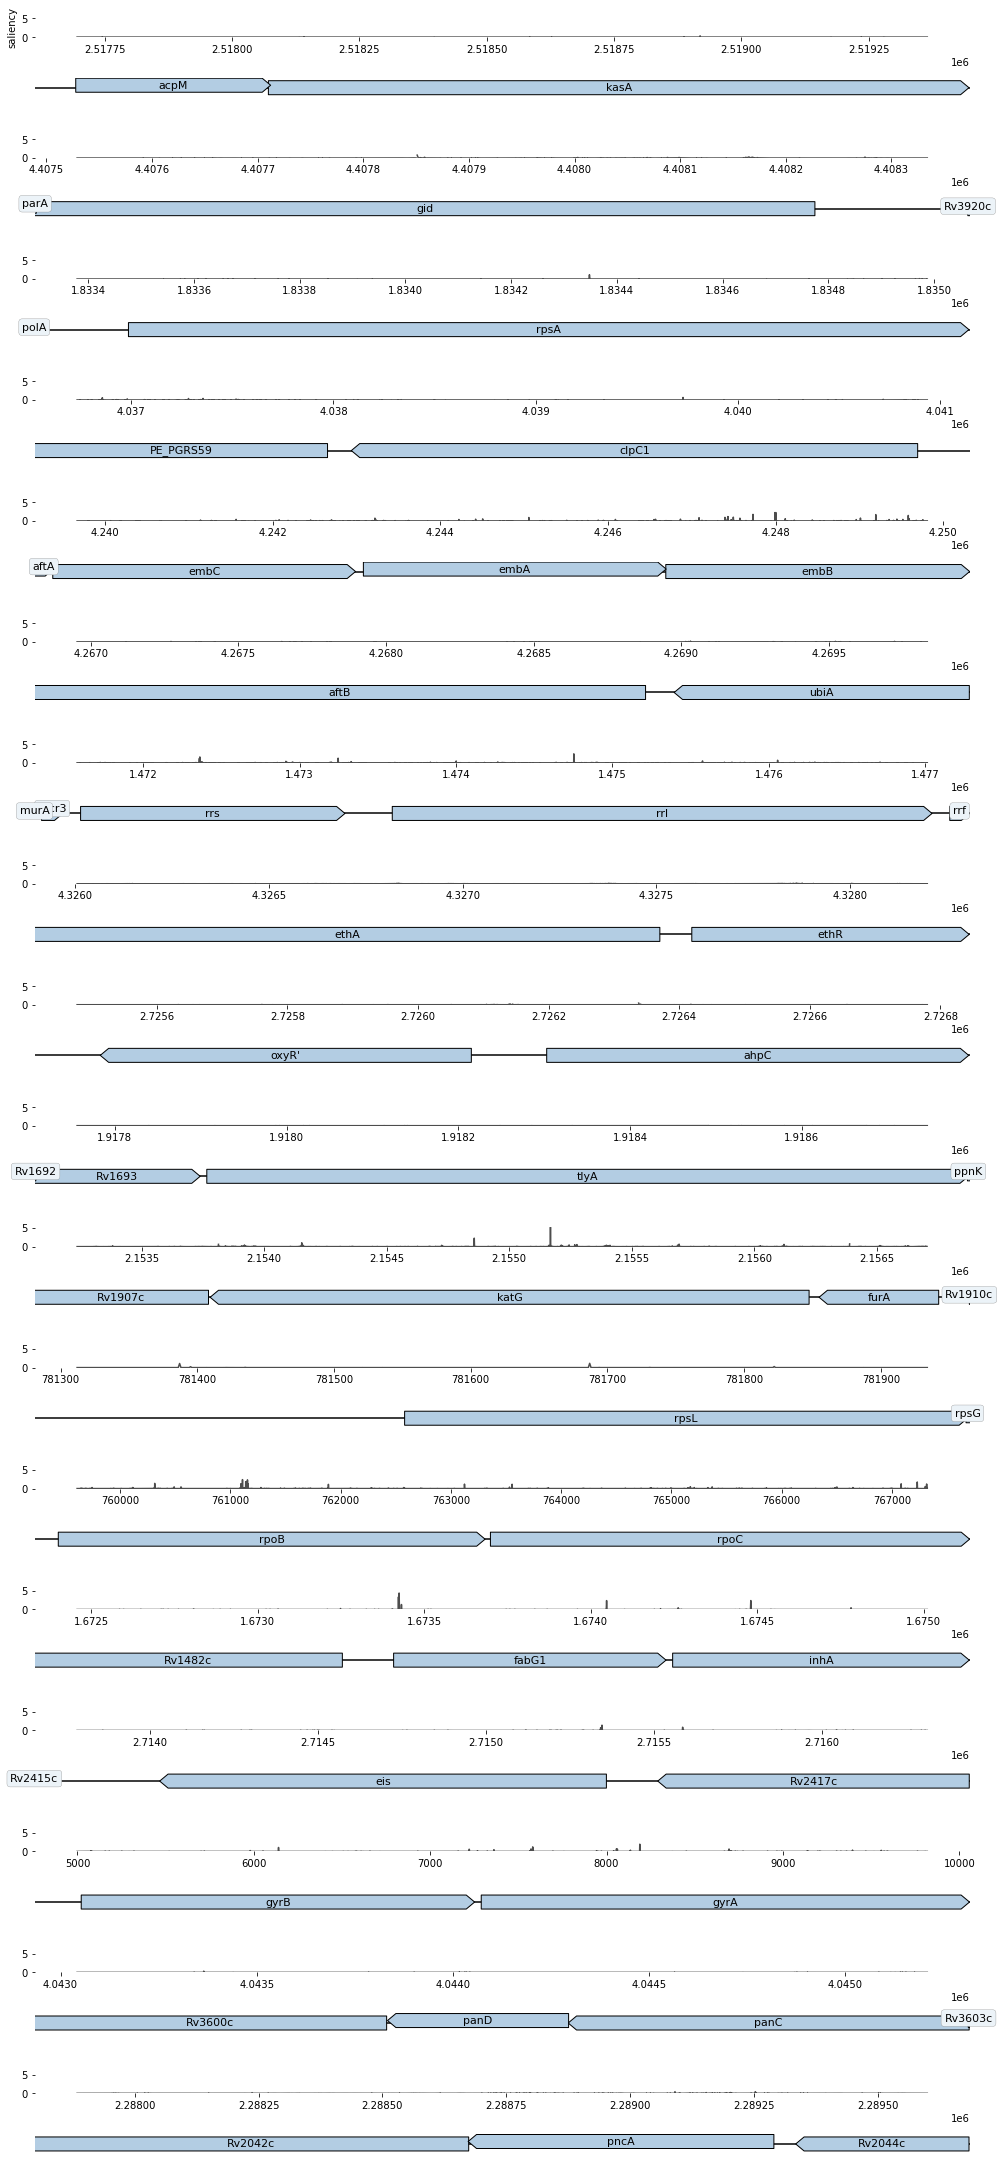

In [9]:
## Plotting each gene locus

!mkdir figures


for drug in drug_list:
    combined = np.load(f"{data_path}/md_cnn_saliency/{drug}_max.npy")
    combined = np.abs(combined)
    allbound=np.max(combined)

    fig, ax = plt.subplots(coords.shape[1]*2, 1, figsize=(14,30))
    axes=ax.flatten()

    for i,name in enumerate(name_list):

        ax_coords = axes[(i)*2+1]
        ax_saliency = axes[(i)*2]
        length =int(coords[0,i])+ name_to_len[name]

        cropped_record = graphic_record.crop((int(coords[0,i]), int(coords[0,i])+name_to_len[name]))

        cropped_record.plot(
            ax=ax_coords, with_ruler=False,
        )

        ax_coords.set_xlim([int(coords[0,i]), int(coords[0,i])+ name_to_len[name]])
        ax_coords.set_ylim([-4,4])

        ax_saliency.plot(coords[:,i], combined[:,i], color="#4d4d4d") 
        ax_saliency.set_ylim([0, allbound+0.01*allbound])

        sns.despine(ax=ax_saliency, top=True, right=True, left=True, bottom=True)


    ax[0].set_ylabel("saliency")

    #plt.suptitle(f"{drug.upper()} Saliency Map")
    plt.tight_layout()
    plt.savefig(f"figures/MD-CNN_{drug}_max.pdf") 
